In [1]:
import pandas
import os
import sys
import itertools
import plotly
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from nilearn import plotting
from nilearn.datasets import MNI152_FILE_PATH
from sklearn.cross_decomposition import CCA, PLSRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, calinski_harabaz_score, silhouette_score
from statsmodels.sandbox.stats.multicomp import multipletests
from importlib import reload
sys.path.insert(0,'/home/users/jvogel/git/data_driven_pathology/')
#sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology')
import vogel_basc as vb
import CrossDecomp as XD
sys.path.insert(0,'/home/users/jvogel/git/Hippocampus_AP_Axis/')
import HAP_Utils as hap

In [2]:
%matplotlib inline

# Prepare Data

In [3]:
wdir = '/data1/users/jvogel/Allen_Human_Brain_Atlas/'
#wdir = '/Users/jakevogel/Science/AHBA/'
gdf = pandas.read_csv(os.path.join(wdir,'gxp_correlation_wholebrain_results_NEW.csv'))
probes = pandas.read_csv(os.path.join(wdir,'normalized_microarray_donor9861/Probes.csv'))
#probes = pandas.read_csv('/Users/jakevogel/Downloads/normalized_microarray_donor9861/Probes.csv')
shtz = sorted(glob(os.path.join(wdir,'normalized_microarray_donor*/MExp_all_genes_ctr_for_donor')))
holder = []
for sht in shtz:
    holder.append(pandas.read_csv(sht,index_col=0))
bigdf = pandas.concat(holder,axis=1)
del(holder)
bigdf = bigdf.values.T

In [4]:
too_few = [x for x in gdf.structure_acronym.value_counts().index if gdf.structure_acronym.value_counts()[x] < 2]
gdf.loc[:,'new_structure_acronym'] = ['Other' if x in too_few else x for x in gdf.structure_acronym.values]

In [5]:
pcamod = PCA(n_components=100, random_state=123).fit(bigdf)
sum(pcamod.explained_variance_ratio_)

0.77999189587171236

In [6]:
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf))

In [7]:
#pca_tfm = pandas.DataFrame(np.load('/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/train_PCA.npz'
#                                  )['arr_0'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakevogel/Dropbox/McGill/Neur608/Final_Project/stuff/train_PCA.npz'

In [7]:
gdf.loc[:,'abs_mni_nlin_x'] = abs(gdf.mni_nlin_x.values)
tr,te = train_test_split(pca_tfm, stratify=gdf.new_structure_acronym.values, random_state=123)
tr_y = gdf.loc[tr.index,['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index,['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]

# Train model

In [8]:
from sklearn.cross_decomposition import PLSCanonical, PLSSVD
ncs = 10
nc_chooser = pandas.DataFrame(index = range(ncs*3), columns = ['nc', 'estimator', 'r2','mae'])
i=0
for k,nc in enumerate(range(1,ncs+1)):
    print(nc)
    estimators = {'PLSR': PLSRegression(n_components=nc), 
                  'CCA': CCA(n_components=nc),
                 'PLSC': PLSCanonical(n_components=nc)}
    nc_chooser.loc[k*3:k*3+2,'nc'] = [nc]*3
    for lab, estimator in estimators.items():
        pred = cross_val_predict(estimator, tr, tr_y, 
                                groups = gdf.loc[tr.index].slab_type, cv=10)
        nc_chooser.loc[i, 'r2'] = r2_score(y_true=tr_y, y_pred=pred)
        nc_chooser.loc[i, 'mae'] = mean_absolute_error(y_true=tr_y, y_pred=pred)
        nc_chooser.loc[i, 'estimator'] = lab
        i+=1

1
2
3
4


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

5


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

6


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

7


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

8


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

9


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

10


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning:

Y residual constant at iteration 3

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-p

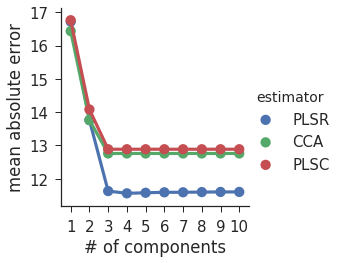

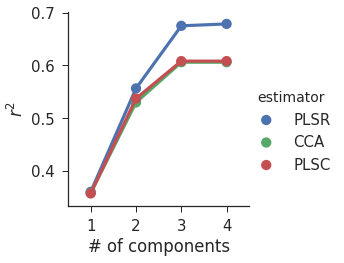

In [9]:
sns.set(font_scale=1.5)
sns.set_style('ticks')

sns.factorplot(x = 'nc', y='mae', hue = 'estimator', data=nc_chooser)
plt.ylabel('mean absolute error')
plt.xlabel('# of components')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/estimator_selection_cv_mae.pdf', 
#            bbox_inches='tight')
plt.show()

sns.factorplot(x = 'nc', y='r2', hue = 'estimator', 
               data=nc_chooser[nc_chooser.nc<5])
plt.ylabel('$r^{2}$')
plt.xlabel('# of components')
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/ADDX/estimator_selection_cv_mae.pdf', 
            bbox_inches='tight')
plt.show()

In [11]:
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400
finished iteration 500
finished iteration 600
finished iteration 700
finished iteration 800
finished iteration 900


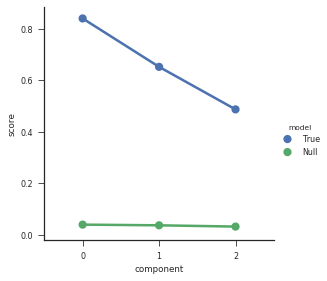

component 0: p = 0.001  ***
component 1: p = 0.001  ***
component 2: p = 0.001  ***


In [12]:
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y, n_iterations=1000)

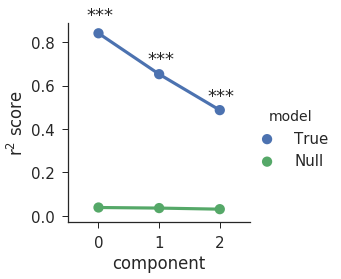

In [12]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.factorplot(x='component', y='score', hue='model', data=results)
plt.text(-0.20,0.9,'***')
plt.text(0.80,0.7,'***')
plt.text(1.80,0.53,'***')
plt.ylabel('r$^2$ score')
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/ADDX/sig_components.pdf',
             bbox_inches='tight')

# Evaluate model

In [13]:
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

In [21]:
explained = 1 * .840514335
1 - .840514335

0.15948566500000005

In [23]:
explained = 0.159485665 * 0.65226703
0.159485 - 0.104027

0.05545799999999999

In [25]:
explained = 0.0554579 * 0.4868136
0.05545799999999999 - 0.0269976599

0.028460340099999995

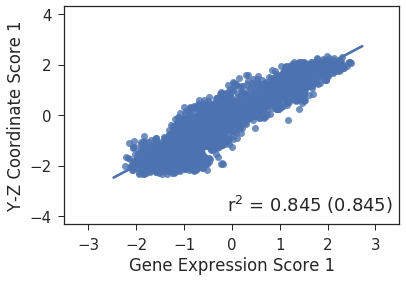

r2 = 0.844679837845, percent of total = 0.844679837845


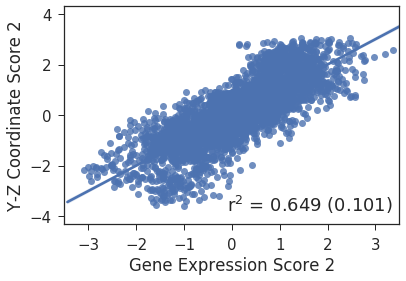

r2 = 0.649300989015, percent of total = 0.100849534901


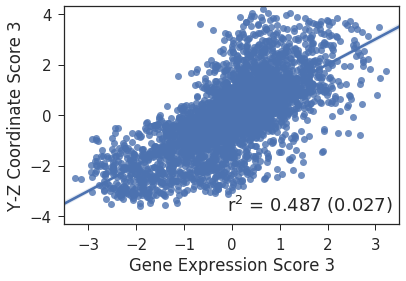

r2 = 0.487420565287, percent of total = 0.0265501039276


In [48]:
# plot component scores
total = 1
leftover = 1
for i in range(pls_mod.n_components):
    r2 = stats.pearsonr(pls_mod.x_scores_[:,i], pls_mod.y_scores_[:,i])[0]**2
    explained = leftover * r2
    plt.close()
    sns.regplot(pls_mod.x_scores_[:,i], pls_mod.y_scores_[:,i])
    plt.xlim(-3.5,3.5)
    plt.ylim(-4.3,4.3)
    plt.xlabel('Gene Expression Score %i'%(i+1))
    plt.ylabel('Y-Z Coordinate Score %i'%(i+1))
    plt.text(-0.1,-3.8,'r$^2$ = %s (%s)'%(round(r2,3),round(explained,3)))
    plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/principal_correlation_%s.pdf'%i,
               bbox_inches='tight')
    plt.show()
    print('r2 = %s, percent of total = %s'%(r2, explained))
    leftover -= explained


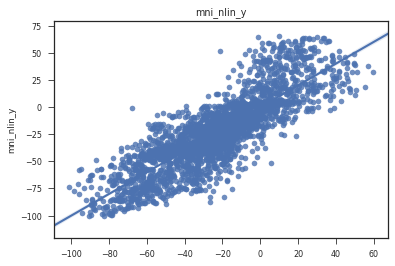

(0.84046214104718642, 0.0)
13.5820282536


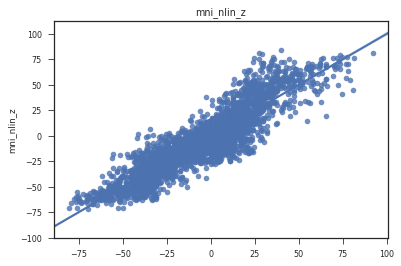

(0.89787982091642138, 0.0)
10.9688531166


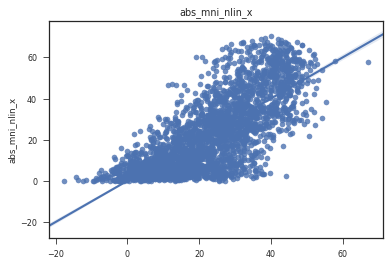

(0.75111867047956304, 0.0)
9.31242705766


In [14]:
# plot model fit
pred = pls_mod.predict(tr)
for i in range(tr_y.shape[-1]):
    plt.close()
    sns.regplot(pred[:,i], tr_y[tr_y.columns[i]])
    plt.title(tr_y.columns[i])
    plt.show()
    print(stats.pearsonr(pred[:,i], tr_y[tr_y.columns[i]]))
    print(mean_absolute_error(pred[:,i], tr_y[tr_y.columns[i]]))

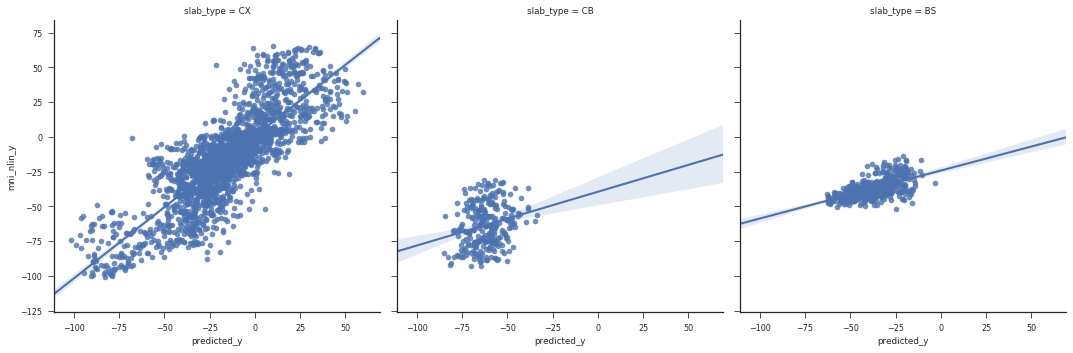

CX r2 =0.66312019368
CX mae =14.8207947819
CB r2 =0.0533670979195
CB mae =13.7014458893
BS r2 =0.318984006802
BS mae =7.75813961436


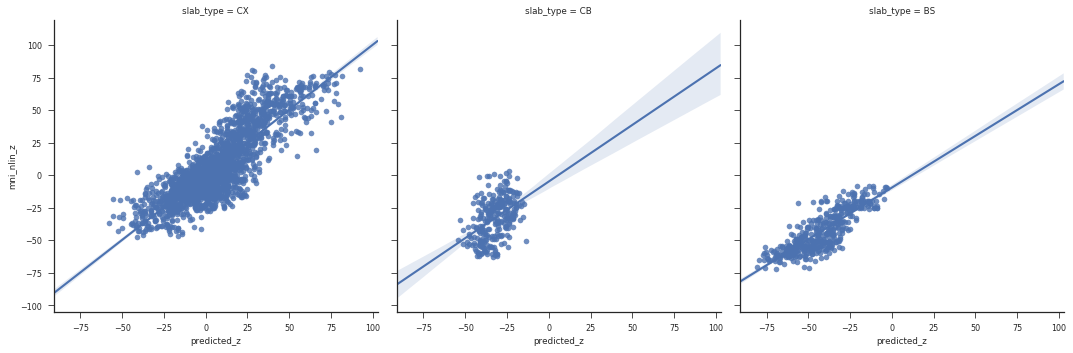

CX r2 =0.698485983259
CX mae =11.5798761351
CB r2 =0.200048343326
CB mae =11.7461668182
BS r2 =0.680020614791
BS mae =7.64700385792


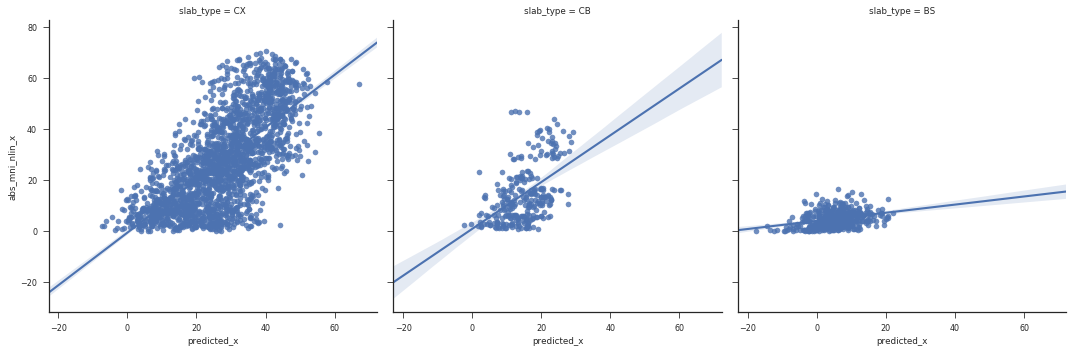

CX r2 =0.470376078922
CX mae =10.4642563852
CB r2 =0.24637036139
CB mae =7.98308167037
BS r2 =0.0986475964915
BS mae =4.79790691074


In [15]:
# plot fit by slab type
preds_df = pandas.concat([pandas.DataFrame(pred, index=tr_y.index), tr_y],axis=1)
preds_df.columns = ['predicted_y', 'predicted_z','predicted_x'] + tr_y.columns.tolist()
preds_df.loc[:,'slab_type'] = gdf.loc[tr.index,'slab_type']
n_components = tr_y.shape[-1]
for i in range(n_components):
    plt.close()
    sns.lmplot(x=preds_df.columns[i], y = preds_df.columns[i+n_components], 
               col = 'slab_type', data = preds_df)
    #plt.title(preds_df.columns[i+n_components])
    plt.show()
    for slab in preds_df.slab_type.unique():
        if not pandas.notnull(slab):
            continue
        r2 = stats.pearsonr(preds_df[preds_df.slab_type==slab][preds_df.columns[i]],
                           preds_df[preds_df.slab_type==slab][preds_df.columns[i+n_components]]
                           )[0]**2
        mae = mean_absolute_error(preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i]],
                                  preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i+n_components]])
        print('%s r2 =%s'%(slab,r2))
        print('%s mae =%s'%(slab,mae))

# Test model

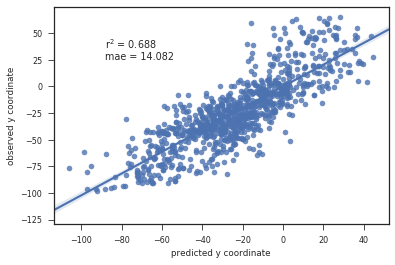

(0.82918586140146766, 1.2281307275869579e-235)
14.0823363128


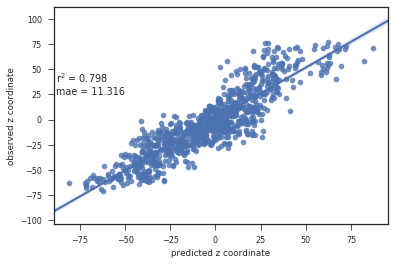

(0.89328206598552351, 3.9525251667299724e-323)
11.3160084218


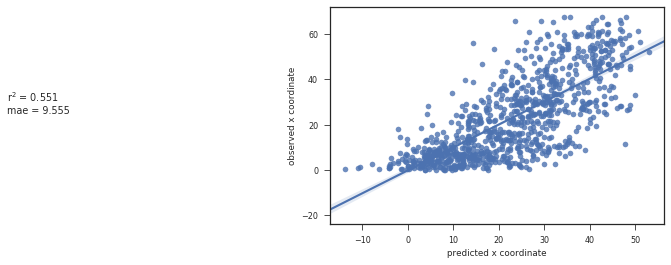

(0.7423632264750617, 6.9134399633643575e-163)
9.55498476164


In [17]:
# plot model fit
dims = ['y','z','x']
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    r2 = stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]])[0]**2
    mae = mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]])
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.xlabel('predicted %s coordinate'%dims[i])
    plt.ylabel('observed %s coordinate'%dims[i])
    plt.text(-88,25,'r$^2$ = %s\nmae = %s'%(round(r2,3),round(mae,3)))
    #plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/ADDX/predicted_%s.pdf'%dims[i],
    #           bbox_inches='tight')
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))

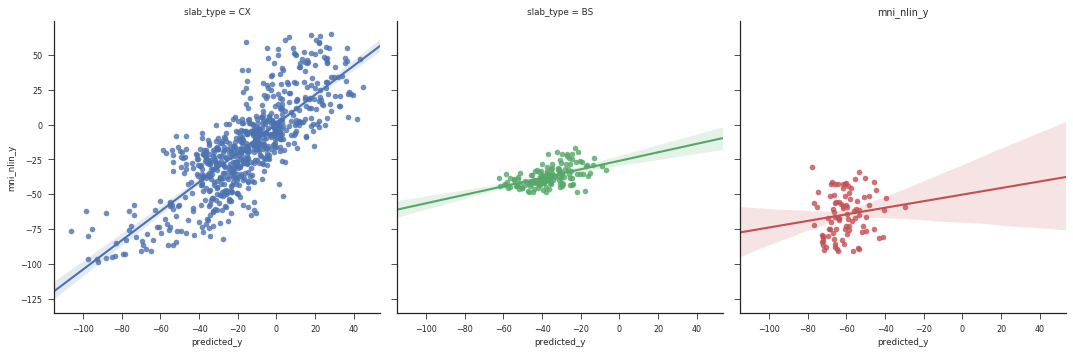

CX r2 =0.640749053609
CX mae =15.3530662358
BS r2 =0.251951396459
BS mae =7.74005585211
CB r2 =0.0193754228558
CB mae =14.3856439964


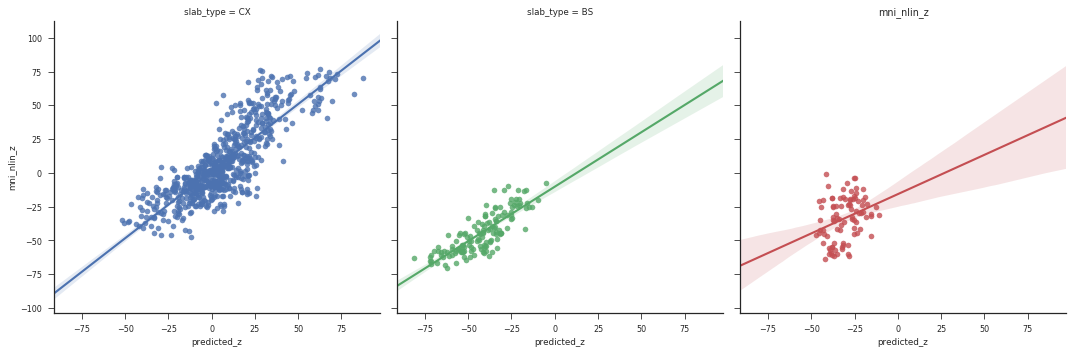

CX r2 =0.686164102861
CX mae =11.8595772165
BS r2 =0.660881008076
BS mae =7.55643705026
CB r2 =0.0960120733154
CB mae =13.0903941384


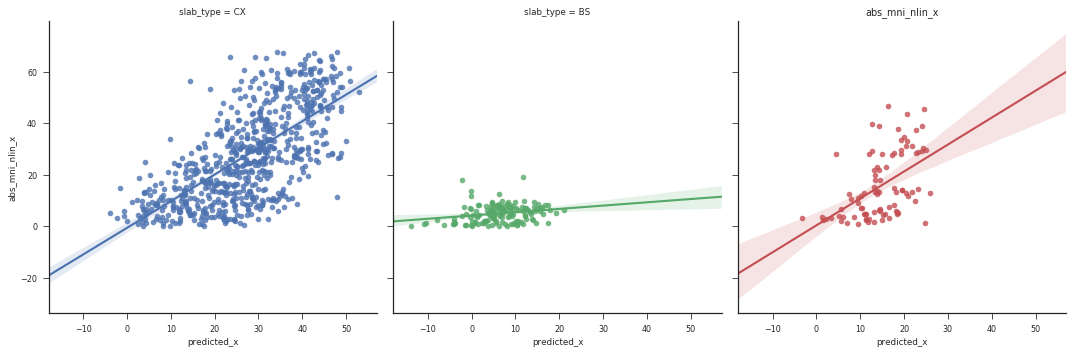

CX r2 =0.461262387359
CX mae =10.586213471
BS r2 =0.0549654487251
BS mae =5.03733713139
CB r2 =0.260359612203
CB mae =8.81227425869


In [18]:
# plot fit by slab type
preds_df = pandas.concat([pandas.DataFrame(te_pred, index=te_y.index), te_y],axis=1)
preds_df.columns = ['predicted_y', 'predicted_z', 'predicted_x'] + te_y.columns.tolist()
preds_df.loc[:,'slab_type'] = gdf.loc[te.index,'slab_type']
n_components = te_y.shape[-1]
for i in range(n_components):
    plt.close()
    sns.lmplot(x=preds_df.columns[i], y = preds_df.columns[i+n_components], hue = 'slab_type', 
               col = 'slab_type', data = preds_df)
    #plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/%s_by_slabtype.pdf'%preds_df.columns[i],
    #           bbox_inches = 'tight')
    plt.title(preds_df.columns[i+n_components])
    plt.show()
    for slab in preds_df.slab_type.unique():
        r2 = stats.pearsonr(preds_df[preds_df.slab_type==slab][preds_df.columns[i]],
                           preds_df[preds_df.slab_type==slab][preds_df.columns[i+n_components]]
                           )[0]**2
        mae = mean_absolute_error(preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i]],
                                  preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i+n_components]])
        print('%s r2 =%s'%(slab,r2))
        print('%s mae =%s'%(slab,mae))

In [19]:
pls_mod = PLSRegression(n_components=3)
full_y = gdf[['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
pls_mod.fit(pca_tfm, full_y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400
finished iteration 500
finished iteration 600
finished iteration 700
finished iteration 800
finished iteration 900


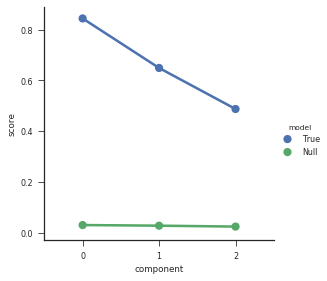

component 0: p = 0.001  ***
component 1: p = 0.001  ***
component 2: p = 0.001  ***


In [20]:
# significant components?
results, comp_sig = XD.evaluate_components(pls_mod, pca_tfm, full_y, n_iterations=1000)

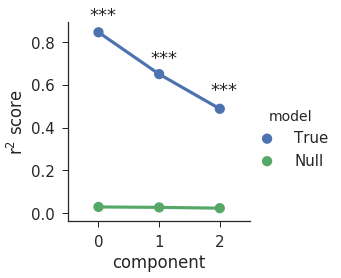

In [37]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.factorplot(x='component', y='score', hue='model', data=results)
plt.text(-0.15,0.9,'***')
plt.text(0.85,0.7,'***')
plt.text(1.85,0.55,'***')
plt.ylabel('r$^2$ score')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/FULLMOD_sig_components.pdf',
#            bbox_inches='tight')
plt.show()

# Build and evaluate model on all data

In [23]:
pls_mod.fit(pca_tfm, full_y)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

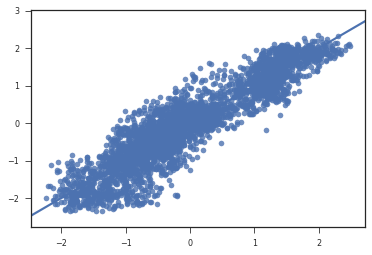

r2 = 0.844679837845, percent of total = 0.844679837845


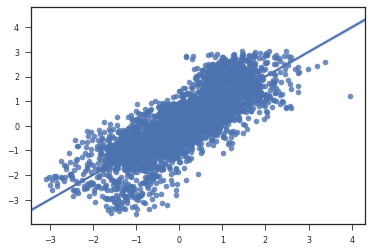

r2 = 0.649300989015, percent of total = 0.100849534901


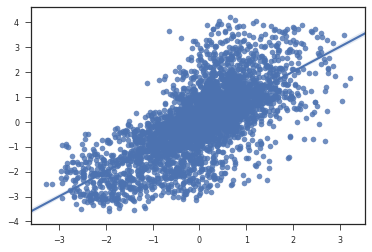

r2 = 0.487420565287, percent of total = 0.0265501039276


In [24]:
pls_mod.fit(pca_tfm, gdf[['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']])
# plot component scores
total = 1
leftover = 1
for i in range(pls_mod.n_components):
    plt.close()
    sns.regplot(pls_mod.x_scores_[:,i], pls_mod.y_scores_[:,i])
    plt.show()
    r2 = stats.pearsonr(pls_mod.x_scores_[:,i], pls_mod.y_scores_[:,i])[0]**2
    explained = leftover * r2
    print('r2 = %s, percent of total = %s'%(r2, explained))
    leftover = leftover - explained

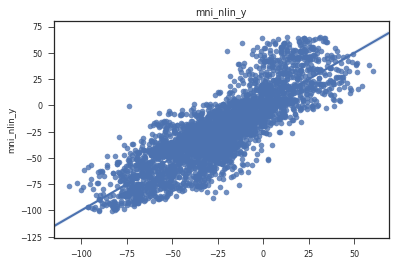

(0.84005125959020377, 0.0)
13.6542368801


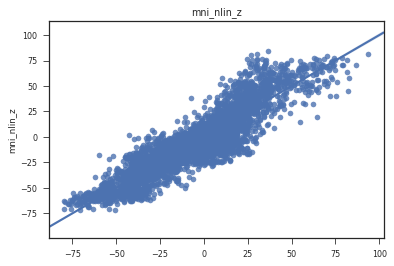

(0.89955309522859705, 0.0)
10.8922981139


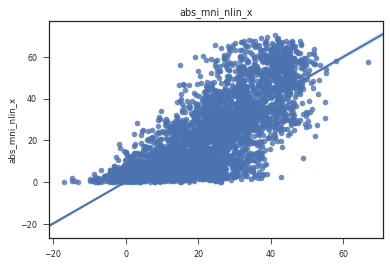

(0.75178969547375896, 0.0)
9.29253655153


In [25]:
# plot model fit
pred = pls_mod.predict(pca_tfm)
for i in range(full_y.shape[-1]):
    plt.close()
    sns.regplot(pred[:,i], full_y[full_y.columns[i]])
    plt.title(full_y.columns[i])
    plt.show()
    print(stats.pearsonr(pred[:,i], full_y[full_y.columns[i]]))
    print(mean_absolute_error(pred[:,i], full_y[full_y.columns[i]]))

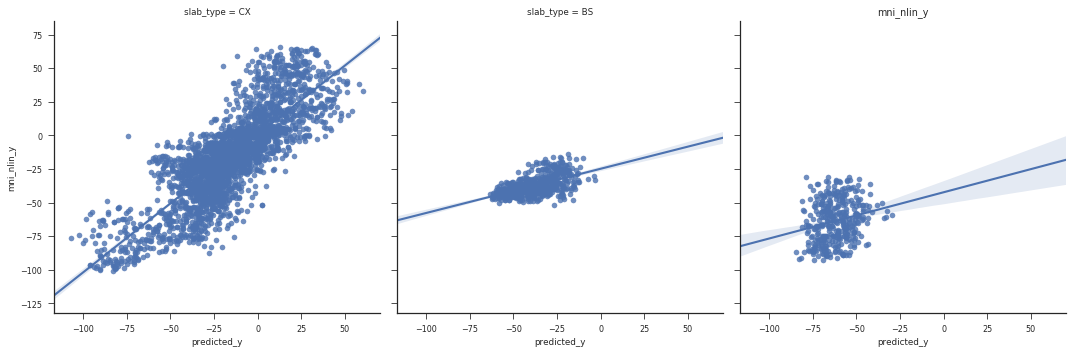

CX r2 =0.66353527872
CX mae =45.7863760692
BS r2 =0.294286845575
BS mae =41.9182483793
CB r2 =0.0462030037215
CB mae =77.1060904588


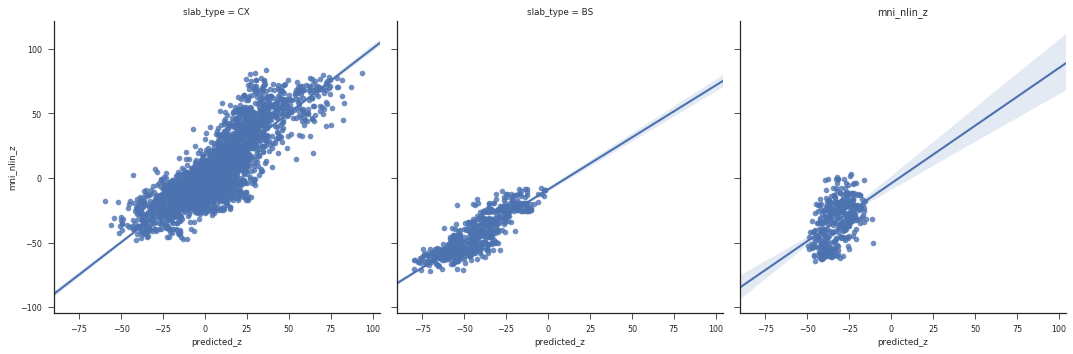

CX r2 =0.699690286854
CX mae =36.3954689635
BS r2 =0.705694635128
BS mae =12.1569478382
CB r2 =0.206729809891
CB mae =31.4440693266


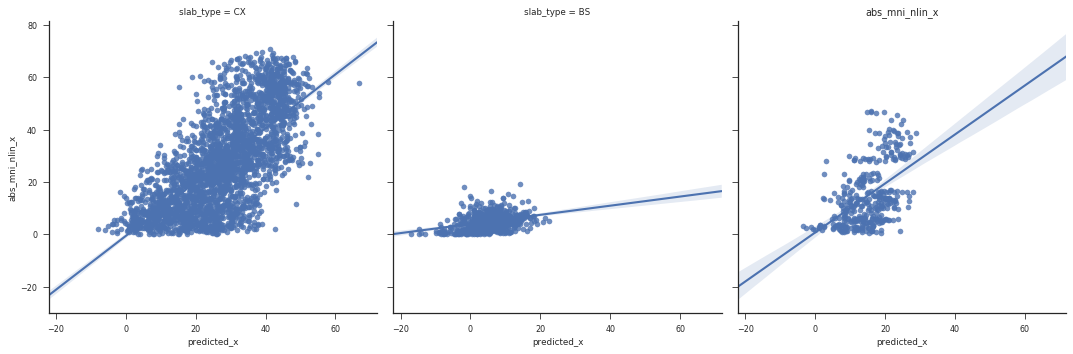

CX r2 =0.470578983123
CX mae =30.212702311
BS r2 =0.103808608461
BS mae =48.4127552477
CB r2 =0.254321577464
CB mae =48.2890947915


In [26]:
# plot fit by slab type
preds_df = pandas.concat([pandas.DataFrame(pred, index=full_y.index), full_y],axis=1)
preds_df.columns = ['predicted_y', 'predicted_z', 'predicted_x'] + full_y.columns.tolist()
preds_df.loc[:,'slab_type'] = gdf.loc[pca_tfm.index,'slab_type']
n_components = full_y.shape[-1]
for i in range(n_components):
    plt.close()
    sns.lmplot(x=preds_df.columns[i], y = preds_df.columns[i+n_components], 
               col = 'slab_type', data = preds_df)
    plt.title(preds_df.columns[i+n_components])
    plt.show()
    for slab in preds_df.slab_type.unique():
        r2 = stats.pearsonr(preds_df[preds_df.slab_type==slab][preds_df.columns[i]],
                           preds_df[preds_df.slab_type==slab][preds_df.columns[i+n_components]]
                           )[0]**2
        mae = mean_absolute_error(preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i]],
                                  preds_df[preds_df.slab_type==slab
                                          ][preds_df.columns[i+2]])
        print('%s r2 =%s'%(slab,r2))
        print('%s mae =%s'%(slab,mae))

# Visualize predictions

In [42]:
preds_df.loc[:,'structure'] = gdf.structure_acronym.values

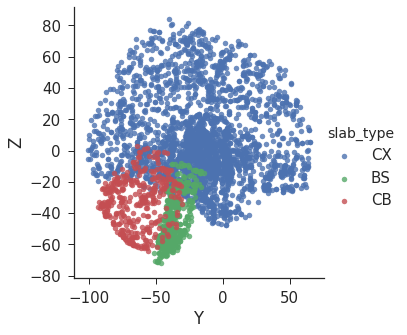

In [44]:
sns.lmplot('mni_nlin_y', 'mni_nlin_z', hue = 'slab_type', data=gdf, fit_reg=False, 
           scatter_kws={"s": 30})
plt.xlabel('Y')
plt.ylabel('Z')
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/ADDX/brain_plot.pdf',
           bbox_inches='tight')

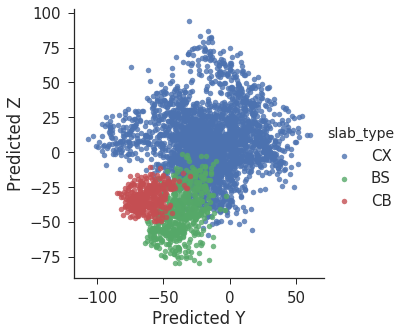

In [45]:
sns.lmplot('predicted_y', 'predicted_z', hue = 'slab_type', data=preds_df, 
           fit_reg=False, scatter_kws={"s": 30})
plt.xlabel('Predicted Y')
plt.ylabel('Predicted Z')
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/ADDX/brain_plot_predicted.pdf',
           bbox_inches='tight')

Text(58.7683977865, 0.5, 'Y')

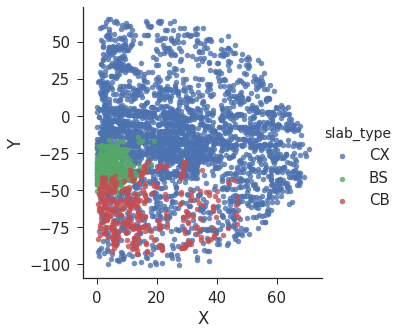

In [46]:
sns.lmplot('abs_mni_nlin_x', 'mni_nlin_y', hue = 'slab_type', data=gdf, fit_reg=False, 
           scatter_kws={"s": 30})
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/brain_plot.pdf',
#           bbox_inches='tight')

Text(58.7683977865, 0.5, 'Predicted Y')

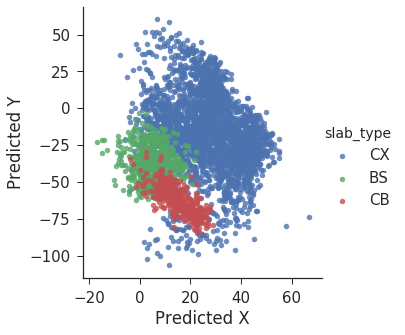

In [47]:
sns.lmplot('predicted_x', 'predicted_y', hue = 'slab_type', data=preds_df, 
           fit_reg=False, scatter_kws={"s": 30})
plt.xlabel('Predicted X')
plt.ylabel('Predicted Y')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/brain_plot_predicted.pdf',
#           bbox_inches='tight')

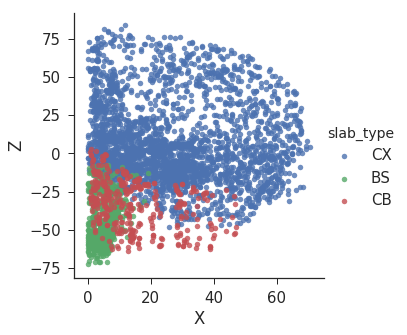

In [41]:
sns.lmplot('abs_mni_nlin_x', 'mni_nlin_z', hue = 'slab_type', data=gdf, fit_reg=False, 
           scatter_kws={"s": 30})
plt.xlabel('X')
plt.ylabel('Z')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/brain_plot.pdf',
#           bbox_inches='tight')

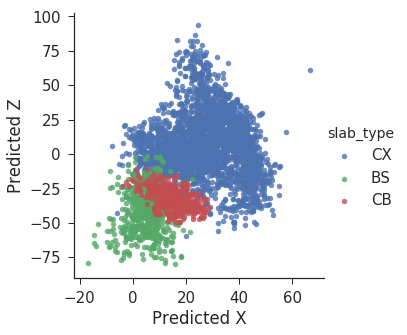

In [42]:
sns.lmplot('predicted_x', 'predicted_z', hue = 'slab_type', data=preds_df, 
           fit_reg=False, scatter_kws={"s": 30})
plt.xlabel('Predicted X')
plt.ylabel('Predicted Z')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/brain_plot_predicted.pdf',
#           bbox_inches='tight')

In [97]:
labs = [0 if gdf.loc[x,'slab_type'] == 'CX' else 1 if gdf.loc[x,'slab_type'] == 'BS' else 2 for x in gdf.index]
embedding = gdf[['abs_mni_nlin_x','mni_nlin_y','mni_nlin_z']].values

lmap = dict(zip(np.unique(labs),gdf.slab_type.unique()))
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab10(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, filename='brain.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 14668 is still running



'file:///home/users/jvogel/git/hack_projects/brain.html'

In [98]:
labs = [0 if gdf.loc[x,'slab_type'] == 'CX' else 1 if gdf.loc[x,'slab_type'] == 'BS' else 2 for x in gdf.index]
embedding = preds_df[['predicted_x','predicted_y','predicted_z']].values

lmap = dict(zip(np.unique(labs),gdf.slab_type.unique()))
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab10(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, filename='predicted_brain.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 14728 is still running



'file:///home/users/jvogel/git/hack_projects/predicted_brain.html'

# Examine components

In [27]:
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(pca_tfm, full_y)
bsrx, bsry, allx_bs, ally_bs = XD.bootstrap_features(PLSRegression(n_components=3), 
                                                  pls_mod, 
                                                  pca_tfm, 
                                                  gdf[['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']], 
                                                  n_iterations=1000)

finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400
finished iteration 500
finished iteration 600
finished iteration 700
finished iteration 800
finished iteration 900


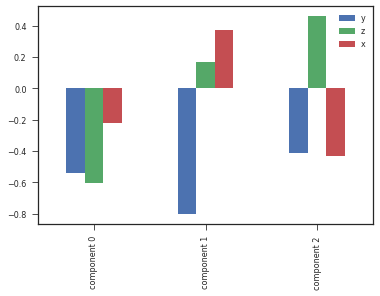

In [28]:
pandas.DataFrame(pls_mod.y_weights_, 
                 index=['component %s'%x for x in range(3)],
                 columns=['y','z','x']).plot.bar()

In [29]:
plotr = pandas.concat([pandas.Series(allx_bs[0].values.flatten()),
                       #pandas.Series(list(range(100))*500)],
                       pandas.Series(list(range(100))*1000)],
                      axis=1)
plotr.columns = ['Loading','Component']

Text(0, 0.5, 'PLS X Score 1 Loading')

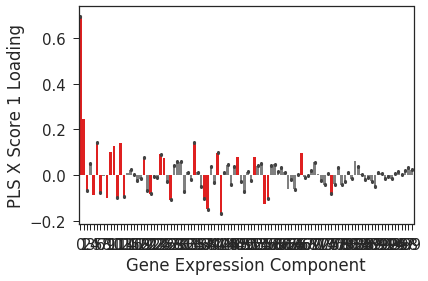

In [30]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
colors = ['Red' if x else 'Grey' for x in multipletests(bsrx['p'].loc[0], method='fdr_bh')[0]]
sns.barplot(x='Component', y='Loading', data=plotr, palette=colors)
plt.xlabel('Gene Expression Component')
plt.ylabel('PLS X Score 1 Loading')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/C1_x_loadings.pdf',
#           bbox_inches='tight')
#g.set_xticklabels([None for x in range(100)])
#plt.xticks(['' for x in range(100)])

In [31]:
sigs = multipletests(bsrx['p'].loc[0], method='fdr_bh')[0]
new_loading = [pls_mod.x_loadings_[x,0] if sigs[x] else 0 for x in range(pca_tfm.shape[-1])]

In [32]:
newc1 = np.dot(pcamod.components_.T, new_loading)
newc1 = pandas.concat([pandas.Series(newc1), probes[['gene_symbol','gene_name']]], axis=1)

In [33]:
newc1.sort_values(0,ascending=False)

0    gene_symbol  \
612    0.048532            DAO   
2313   0.045748          HOXB5   
53500  0.043817   A_24_P815062   
26396  0.042747           PAX2   
2306   0.042044          HOXB2   
2307   0.040475          HOXB3   
2290   0.038832          HOXA4   
4879   0.037717           PRPH   
38830  0.034591           IRX2   
2297   0.034426          HOXA7   
2288   0.034406          HOXA2   
2295   0.034034          HOXA6   
29284  0.033814          HOXA3   
611    0.033707            DAO   
48925  0.033486   A_23_P344673   
52908  0.031074   A_24_P101282   
2342   0.030769          HOXD3   
2309   0.030262          HOXB3   
10340  0.029443          STON1   
17803  0.028669         SLC5A7   
3404   0.028332            MET   
2315   0.027900          HOXB6   
6754   0.027243         TFAP2B   
10341  0.027168          STON1   
2293   0.027149          HOXA5   
38062  0.026808  RP11-834C11.4   
45160  0.026595           IRX2   
47041  0.026441         CHRNA3   
5083   0.025170         POU4F1   
22271  0.024983        C5orf38   
...         ...            ...   
8446  -0.031034           LHX2   
37101 -0.031358         FRMPD2   
32770 -0.031370           CRYM   
7825  -0.031677          HSPB3   
22847 -0.032053        GALNTL5   
37384 -0.032320      LOC646627   
28782 -0.032541         OR14I1   
33199 -0.032550          RXFP1   
52121 -0.032643   A_23_P124534   
6453  -0.033754          NR2E1   
37982 -0.034202          CTXN3   
41725 -0.034580           NRGN   
51    -0.034594            CCK   
52    -0.034690            CCK   
22848 -0.034696        GALNTL5   
42966 -0.035064       KIAA0748   
14589 -0.035128          FEZF2   
29452 -0.035497         THEMIS   
47141 -0.035923          TNNT2   
8691  -0.036092            GDA   
38314 -0.037416       KIAA0748   
12304 -0.038408          MOXD1   
37994 -0.038436           NRGN   
33641 -0.039066           DLX1   
30220 -0.039393          TNNT2   
56559 -0.040100    A_32_P85405   
8692  -0.041172            GDA   
30221 -0.041603          TNNT2   
21889 -0.041712        TMEM155   
46969 -0.048785         FOXG1B   

                                               gene_name  
612                                 D-amino-acid oxidase  
2313                                         homeobox B5  
53500            AGILENT probe A_24_P815062 (non-RefSeq)  
26396                                       paired box 2  
2306                                         homeobox B2  
2307                                         homeobox B3  
2290                                         homeobox A4  
4879                                          peripherin  
38830                                iroquois homeobox 2  
2297                                         homeobox A7  
2288                                         homeobox A2  
2295                                         homeobox A6  
29284                                        homeobox A3  
611                                 D-amino-acid oxidase  
48925            AGILENT probe A_23_P344673 (non-RefSeq)  
52908            AGILENT probe A_24_P101282 (non-RefSeq)  
2342                                         homeobox D3  
2309                                         homeobox B3  
10340                                           stonin 1  
17803  solute carrier family 5 (choline transporter),...  
3404   met proto-oncogene (hepatocyte growth factor r...  
2315                                         homeobox B6  
6754   transcription factor AP-2 beta (activating enh...  
10341                                           stonin 1  
2293                                         homeobox A5  
38062                          uncharacterized LOC400043  
45160                                iroquois homeobox 2  
47041  cholinergic receptor, nicotinic, alpha 3 (neur...  
5083                              POU class 4 homeobox 1  
22271                 chromosome 5 open reading frame 38  
...                                                  ...  
8446             

In [24]:
newc1.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C1_genelist.csv')

In [40]:
probes.loc[:,'C1'] = newc1[newc1.columns[0]].values

In [53]:
c1_xp = hap.get_gene_vector(pandas.DataFrame(bigdf.T), newc1[0])

In [299]:
input_coords = []
for i,row in gdf.iterrows():
    input_coords.append(hap.convert_coords([round(int(row['mni_nlin_x'])), 
                                        round(int(row['mni_nlin_y'])), 
                                        round(int(row['mni_nlin_z']))], 'xyz'))
nm = 'NEUR608_IMG_c1'
mni_pth = '/home/users/jvogel/Science/templates/templates/MNI152_T1_1mm_brain.nii'
wdir = '/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/'
gcx_img = hap.make_expression_image(c1_xp, input_coords, mni_pth, wdir, nm, 5, return_img=True)

In [58]:
plotting.view_img(gcx_img)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In [41]:
plotr = pandas.concat([pandas.Series(allx_bs[1].values.flatten()),
                       pandas.Series(list(range(100))*1000)],
                      axis=1)
plotr.columns = ['Loading','Component']

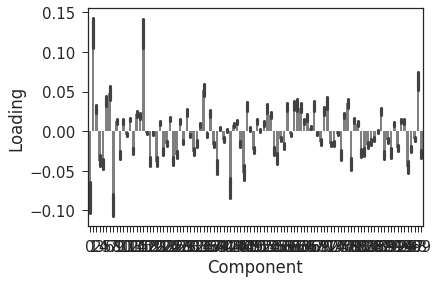

In [42]:
colors = ['Red' if x < 0.05 else 'Grey' for x in bsrx['p'].loc[1]]
sns.barplot(x='Component', y='Loading', data=plotr, palette=colors)

In [43]:
bsrx['p']

0      1      2      3      4      5      6      7      8      9   \
0  0.001  0.001   0.01   0.07  0.001  0.001  0.007  0.442  0.001  0.001   
1  0.331  0.331  0.331  0.331  0.331  0.331  0.331  0.331   0.37  0.332   
2  0.001  0.057  0.018  0.379  0.001  0.013  0.432  0.001   0.42  0.001   

   ...       90     91     92     93     94     95     96     97     98     99  
0  ...      0.4  0.317  0.397  0.297  0.382  0.301  0.483  0.272  0.217  0.226  
1  ...    0.331  0.397  0.341  0.378  0.371  0.331   0.34  0.389  0.331  0.335  
2  ...    0.001  0.295  0.358  0.484  0.351  0.016  0.189  0.039  0.126  0.258  

[3 rows x 100 columns]

Text(0, 0.5, 'PLS X Score 2 Loading')

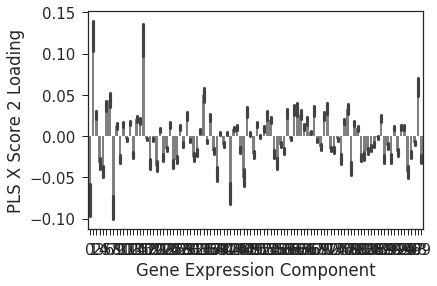

In [27]:
colors = ['Red' if x else 'Grey' for x in multipletests(bsrx['p'].loc[1], method='fdr_bh')[0]]
sns.barplot(x='Component', y='Loading', data=plotr, palette=colors)
plt.xlabel('Gene Expression Component')
plt.ylabel('PLS X Score 2 Loading')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/C2_x_loadings.pdf',
#           bbox_inches='tight')

In [52]:
# Need to modify this because for some reason nothing is significant


sigs = multipletests(bsrx['p'].loc[1], method='fdr_bh')[0]
new_loading = [pls_mod.x_loadings_[x,1] if not sigs[x] else 0 for x in range(pca_tfm.shape[-1])] # changed to if not here
newc2 = np.dot(pcamod.components_.T, new_loading)
newc2 = pandas.concat([pandas.Series(newc2), probes[['gene_symbol','gene_name']]], axis=1)

In [62]:
# sigs = multipletests(bsrx['p'].loc[1], method='fdr_bh')[0]
# new_loading = [pls_mod.x_loadings_[x,1] if sigs[x] else 0 for x in range(pca_tfm.shape[-1])]
# newc2 = np.dot(pcamod.components_.T, new_loading)
# newc2 = pandas.concat([pandas.Series(newc2), probes[['gene_symbol','gene_name']]], axis=1)

In [53]:
newc2.sort_values(0,ascending=False)

0   gene_symbol  \
3404   0.065229           MET   
3405   0.064917           MET   
3403   0.047116           MET   
6582   0.040164           TTR   
13405  0.037713          SOST   
16253  0.035849         DMRT3   
15647  0.035243       CYP26B1   
15951  0.035218         TDRD1   
5009   0.034510         PVALB   
5008   0.033675         PVALB   
3858   0.033584           MGP   
26331  0.032096         SCN1B   
31892  0.031204        CADPS2   
157    0.031103          CD70   
54829  0.030436   A_32_P78705   
31894  0.029832        CADPS2   
29196  0.029686        TRIM54   
31893  0.029552        CADPS2   
55800  0.028990   A_32_P47778   
478    0.028892        COX7A1   
3987   0.028619          NNMT   
26330  0.028507         SCN1B   
32619  0.028232        COL5A1   
31111  0.027571         PTGS1   
2941   0.027301          LAG3   
46069  0.027167          KLK8   
4385   0.027126         NPTX1   
4386   0.026980         NPTX1   
5319   0.026702           RHO   
26762  0.026531        MYBPHL   
...         ...           ...   
49718 -0.028381  A_23_P104484   
11977 -0.028620        TRIM29   
9070  -0.028734        TSPAN2   
15471 -0.029174         GABRQ   
40188 -0.029235        AMIGO2   
22614 -0.029504       FAM163A   
48647 -0.030957  A_24_P525749   
6786  -0.031264         TGFBI   
12939 -0.031431           GAL   
4620  -0.031683         PRRX1   
12941 -0.032878           GAL   
41426 -0.033137         CTXN3   
22838 -0.033445        PRSS23   
41367 -0.033587         CTXN3   
12938 -0.034269           GAL   
12940 -0.034522           GAL   
58161 -0.035454  A_24_P564761   
12942 -0.035674           GAL   
36851 -0.035920        AMIGO2   
18215 -0.036659          GSG1   
8716  -0.036750          MTL5   
43970 -0.037869          PIRT   
37982 -0.038176         CTXN3   
24515 -0.039808         SYT10   
5979  -0.040857           SLN   
5978  -0.041660           SLN   
24514 -0.042154         SYT10   
54487 -0.048457  A_32_P115840   
57805 -0.048831   A_32_P64286   
52653 -0.049611  A_32_P146485   

                                               gene_name  
3404   met proto-oncogene (hepatocyte growth factor r...  
3405   met proto-oncogene (hepatocyte growth factor r...  
3403   met proto-oncogene (hepatocyte growth factor r...  
6582                                       transthyretin  
13405                                         sclerostin  
16253  doublesex and mab-3 related transcription fact...  
15647  cytochrome P450, family 26, subfamily B, polyp...  
15951                          tudor domain containing 1  
5009                                         parvalbumin  
5008                                         parvalbumin  
3858                                  matrix Gla protein  
26331  sodium channel, voltage-gated, type I, beta su...  
31892               Ca++-dependent secretion activator 2  
157                                        CD70 molecule  
54829             AGILENT probe A_32_P78705 (non-RefSeq)  
31894               Ca++-dependent secretion activator 2  
29196                     tripartite motif containing 54  
31893               Ca++-dependent secretion activator 2  
55800             AGILENT probe A_32_P47778 (non-RefSeq)  
478    cytochrome c oxidase subunit VIIa polypeptide ...  
3987                    nicotinamide N-methyltransferase  
26330  sodium channel, voltage-gated, type I, beta su...  
32619                          collagen, type V, alpha 1  
31111  prostaglandin-endoperoxide synthase 1 (prostag...  
2941                        lymphocyte-activation gene 3  
46069                     kallikrein-related peptidase 8  
4385                                neuronal pentraxin I  
4386                                neuronal pentraxin I  
5319                                           rhodopsin  
26762                      myosin binding protein H-like  
...                                                  ...  
49718            AGILENT probe A_23_P104484 (non-RefSeq)  
11977               

In [54]:
newc1.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C2_genelist.csv')

In [55]:
probes.loc[:,'C2'] = newc2[newc2.columns[0]].values

In [66]:
c2_xp = hap.get_gene_vector(pandas.DataFrame(bigdf.T), newc2[0])

In [300]:
input_coords = []
for i,row in gdf.iterrows():
    input_coords.append(hap.convert_coords([round(int(row['mni_nlin_x'])), 
                                        round(int(row['mni_nlin_y'])), 
                                        round(int(row['mni_nlin_z']))], 'xyz'))
nm = 'NEUR608_IMG_c2'
mni_pth = '/home/users/jvogel/Science/templates/templates/MNI152_T1_1mm_brain.nii'
wdir = '/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/'
gcx_img = hap.make_expression_image(c2_xp, input_coords, mni_pth, wdir, nm, 5, return_img=True)

In [69]:
plotting.view_img(gcx_img)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In [76]:
bsrx['p']

0      1      2      3      4      5      6      7      8      9   \
0  0.001  0.001  0.002  0.045  0.062  0.001  0.005  0.006  0.003  0.001   
1  0.437  0.001  0.003  0.001  0.001  0.001  0.001  0.001  0.193  0.001   
2  0.437  0.001  0.003  0.001  0.001  0.001  0.001  0.001  0.193  0.001   

   ...       90     91     92     93     94     95     96     97     98     99  
0  ...    0.157   0.39  0.454  0.301  0.384  0.069  0.381  0.508  0.147  0.146  
1  ...    0.195  0.331  0.017  0.163  0.208  0.001  0.006  0.388  0.001  0.011  
2  ...    0.195  0.331  0.017  0.163  0.208  0.001  0.006  0.388  0.001  0.011  

[3 rows x 100 columns]

In [56]:
plotr = pandas.concat([pandas.Series(allx_bs[2].values.flatten()),
                       pandas.Series(list(range(100))*1000)],
                      axis=1)
plotr.columns = ['Loading','Component']

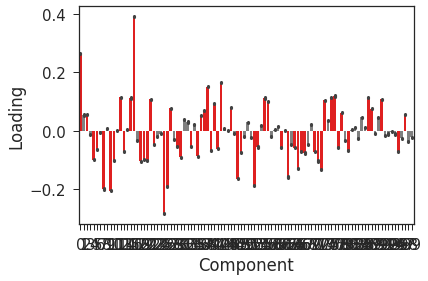

In [57]:
colors = ['Red' if x < 0.05 else 'Grey' for x in bsrx['p'].loc[2]]
sns.barplot(x='Component', y='Loading', data=plotr, palette=colors)

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


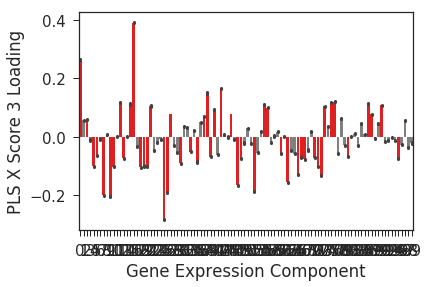

In [81]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
colors = ['Red' if x else 'Grey' for x in multipletests(bsrx['p'].loc[2], method='fdr_bh')[0]]
sns.barplot(x='Component', y='Loading', data=plotr, palette=colors)
plt.xlabel('Gene Expression Component')
plt.ylabel('PLS X Score 3 Loading')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/figs/C1_x_loadings.pdf',
#           bbox_inches='tight')
#g.set_xticklabels([None for x in range(100)])
#plt.xticks(['' for x in range(100)])

In [58]:
sigs = multipletests(bsrx['p'].loc[2], method='fdr_bh')[0]
new_loading = [pls_mod.x_loadings_[x,2] if sigs[x] else 0 for x in range(pca_tfm.shape[-1])]
newc3 = np.dot(pcamod.components_.T, new_loading)
newc3 = pandas.concat([pandas.Series(newc3), probes[['gene_symbol','gene_name']]], axis=1)

In [59]:
newc3.sort_values(0,ascending=False)

0   gene_symbol  \
6582   0.062039           TTR   
58161  0.045153  A_24_P564761   
37982  0.042784         CTXN3   
6581   0.038834           TTR   
41426  0.037627         CTXN3   
45721  0.036574        CSN1S1   
41367  0.035781         CTXN3   
53627  0.034029  A_23_P417646   
12940  0.033110           GAL   
12939  0.032748           GAL   
53626  0.032724  A_23_P417646   
12941  0.032719           GAL   
12938  0.032201           GAL   
4299   0.032023          PCP4   
12942  0.031916           GAL   
4300   0.031592          PCP4   
4301   0.031417          PCP4   
8963   0.030074       ONECUT2   
4062   0.029792           NTS   
4060   0.029592           NTS   
47838  0.029030  A_32_P227921   
8962   0.028805       ONECUT2   
4067   0.026880           NTS   
30856  0.026856          SV2C   
14562  0.026774          EPN3   
30855  0.026762          SV2C   
4063   0.026709           NTS   
4059   0.026597           NTS   
30854  0.026464          SV2C   
4057   0.026437           NTS   
...         ...           ...   
4412  -0.028373          PDYN   
4411  -0.028434          PDYN   
7073  -0.028570         TYRP1   
47295 -0.029360       TP53I11   
4410  -0.030205          PDYN   
44787 -0.030211         ASCL2   
28427 -0.030326        AKAP14   
24685 -0.030731         PYDC1   
4407  -0.030995          PDYN   
4629  -0.031069          PNMT   
4400  -0.031179          PDYN   
24931 -0.031279         KCTD4   
25182 -0.031604     LOC392145   
28305 -0.032411        PTGER3   
53734 -0.032565      C1orf187   
25511 -0.032868       FAM19A1   
3403  -0.033451           MET   
24932 -0.033735         KCTD4   
3858  -0.033979           MGP   
13152 -0.034893        DUSP13   
4375  -0.034931          NPPA   
32711 -0.035124        PTGER3   
4628  -0.035319          PNMT   
23087 -0.035443          EXD1   
3404  -0.038553           MET   
26396 -0.040461          PAX2   
44020 -0.040976  LOC100129291   
46069 -0.041990          KLK8   
28306 -0.044032        PTGER3   
3405  -0.044474           MET   

                                               gene_name  
6582                                       transthyretin  
58161            AGILENT probe A_24_P564761 (non-RefSeq)  
37982                                         cortexin 3  
6581                                       transthyretin  
41426                                         cortexin 3  
45721                                    casein alpha s1  
41367                                         cortexin 3  
53627            AGILENT probe A_23_P417646 (non-RefSeq)  
12940                              galanin prepropeptide  
12939                              galanin prepropeptide  
53626            AGILENT probe A_23_P417646 (non-RefSeq)  
12941                              galanin prepropeptide  
12938                              galanin prepropeptide  
4299                             Purkinje cell protein 4  
12942                              galanin prepropeptide  
4300                             Purkinje cell protein 4  
4301                             Purkinje cell protein 4  
8963                                  one cut homeobox 2  
4062                                         neurotensin  
4060                                         neurotensin  
47838            AGILENT probe A_32_P227921 (non-RefSeq)  
8962                                  one cut homeobox 2  
4067                                         neurotensin  
30856                   synaptic vesicle glycoprotein 2C  
14562                                            epsin 3  
30855                   synaptic vesicle glycoprotein 2C  
4063                                         neurotensin  
4059                                         neurotensin  
30854                   synaptic vesicle glycoprotein 2C  
4057                                         neurotensin  
...                                                  ...  
4412                                        prodynorphin  
4411                

In [33]:
newc3.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C3_genelist.csv')

In [60]:
probes.loc[:,'C3'] = newc3[newc3.columns[0]].values

In [84]:
c3_xp = hap.get_gene_vector(pandas.DataFrame(bigdf.T), newc3[0])

In [301]:
input_coords = []
for i,row in gdf.iterrows():
    input_coords.append(hap.convert_coords([round(int(row['mni_nlin_x'])), 
                                        round(int(row['mni_nlin_y'])), 
                                        round(int(row['mni_nlin_z']))], 'xyz'))
nm = 'NEUR608_IMG_c3'
mni_pth = '/home/users/jvogel/Science/templates/templates/MNI152_T1_1mm_brain.nii'
wdir = '/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/'
gcx_img = hap.make_expression_image(c3_xp, input_coords, mni_pth, wdir, nm, 5, return_img=True)

In [86]:
plotting.view_img(gcx_img)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


### Prepare for GSEA

In [62]:
rank = pandas.DataFrame(index = probes.gene_symbol.unique(), columns = ['beta'])
for i,gene in enumerate(probes.gene_symbol.unique()):
    for col in probes.columns[-3:]:
        db = probes[probes.gene_symbol==gene][col]
        if type(db) == float:
            rank.loc[gene,col] = db
        else:
            #rank.loc[gene,'beta'] = db.mean() # take mean
            rank.loc[gene,col] = db.iloc[np.argmax(db.values)] # take highest rank
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


In [65]:
rank.drop('beta',axis=1,inplace=True)

In [70]:
rank.sort_values('C2',ascending=False).head()

C1        C2        C3
MET      0.028332  0.065229 -0.033451
TTR      0.001506  0.040164  0.062039
SOST    -0.001465  0.037713  0.012148
DMRT3    0.000724  0.035849  0.011679
CYP26B1  0.010748  0.035243 -0.009855

In [73]:
new_rank = pandas.DataFrame(index = range(len(rank)))
new_rank.loc[:,'Symbol'] = rank.index
for col in rank.columns:
    new_rank.loc[:,col] = rank[col].values

new_rank.head()

Symbol        C1        C2        C3
0     C8G  0.000702  0.000065 -0.005231
1      C9  0.000390  0.000572  0.001446
2  MRPL49  0.001989  0.000026 -0.003131
3  ZNHIT2  0.003456 -0.000876  0.000026
4  MPPED2  0.002161 -0.000839 -0.001553

In [77]:
for col in rank.columns:
    new_rank.sort_values(col,ascending=False
                    )[['Symbol',col]].to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/LR_forGSEA_%s.rnk'%col,
                            sep = '\t', index=False)

# Separately for brainstem/cerebellum/cortex

running PCA
explained variance with PCA: 0.7531709576582876
transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



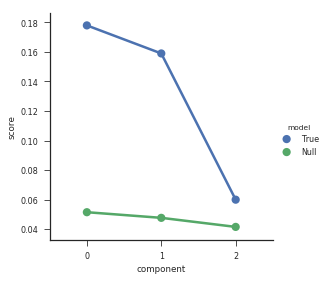

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.004  ***
applying to test data


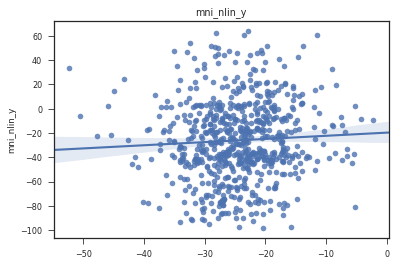

(0.05545231652425856, 0.1465255997031639)
26.35880213184118


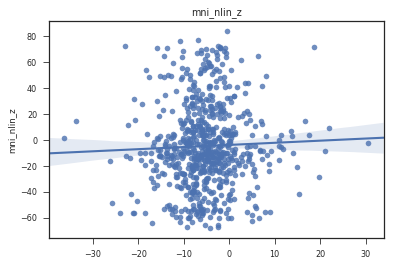

(0.035598658357792655, 0.35151154828248055)
25.821903907324703


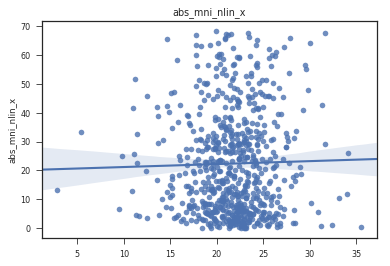

(0.021493668409398488, 0.573841586294461)
14.977091272413166


In [136]:
print('running PCA')
pcamod = PCA(n_components=100, random_state=123).fit(bigdf.values[gdf[gdf.slab_type=='CX'].index,:])
print('explained variance with PCA:',sum(pcamod.explained_variance_ratio_))
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='CX'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
# significant components?
print('evaluating output')
pls_mod.fit(tr,tr_y)
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
# plot model fit
print('applying to test data')
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


running PCA
explained variance with PCA: 0.839794431874411
transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



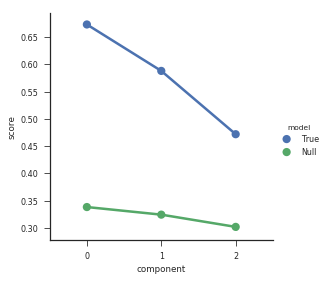

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.002  ***
applying to test data


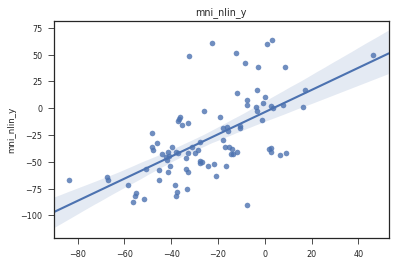

(0.6190757540472102, 4.778947762572875e-11)
21.985881780597452


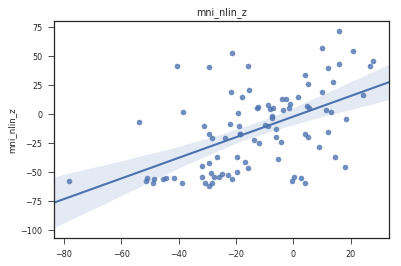

(0.5306763464344875, 5.2902455592508555e-08)
23.43669575193284


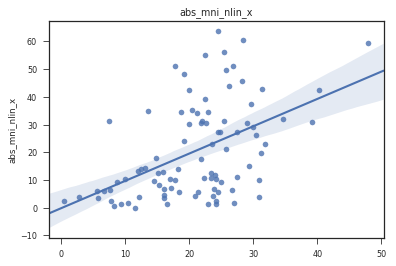

(0.4884775016928761, 7.818493608722346e-07)
11.721952789548151


In [127]:
print('running PCA')
pcamod = PCA(n_components=100, random_state=123).fit(bigdf.values[gdf[gdf.slab_type=='CB'].index,:])
print('explained variance with PCA:',sum(pcamod.explained_variance_ratio_))
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='CB'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)
# significant components?
print('evaluating output')
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
# plot model fit
print('applying to test data')
pls_mod.fit(tr,tr_y)
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


running PCA
explained variance with PCA: 0.7588259225998742
transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



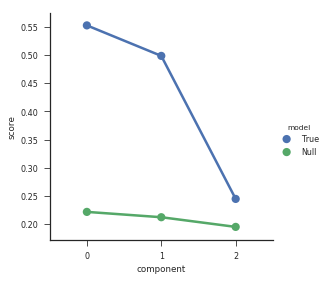

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.018  ***
applying to test data


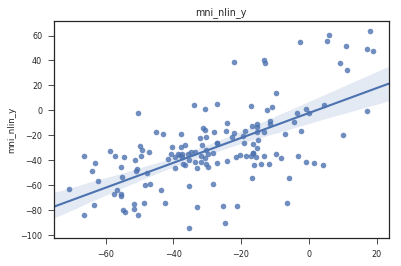

(0.6364295251072718, 4.599895736520842e-18)
18.691768417637032


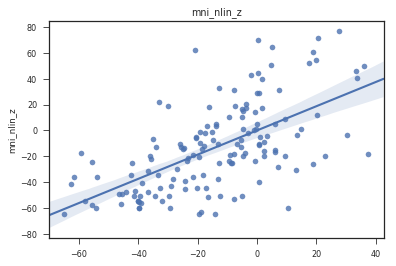

(0.6156612010958226, 1.0559165119599344e-16)
20.748597953420045


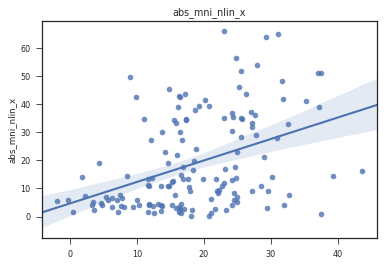

(0.41226818380475433, 2.1203702349414318e-07)
12.138839796742747


In [131]:
print('running PCA')
pcamod = PCA(n_components=100, random_state=123).fit(bigdf.values[gdf[gdf.slab_type=='BS'].index,:])
print('explained variance with PCA:',sum(pcamod.explained_variance_ratio_))
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='BS'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)
# significant components?
print('evaluating output')
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
# plot model fit
print('applying to test data')
pls_mod.fit(tr,tr_y)
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


#### now again with PCA from whole brain

In [ ]:
pcamod = PCA(n_components=100, random_mstate=123).fit(bigdf)
sum(pcamod.explained_variance_ratio_)

transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



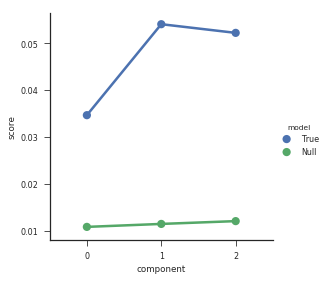

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.002  ***
applying to test data


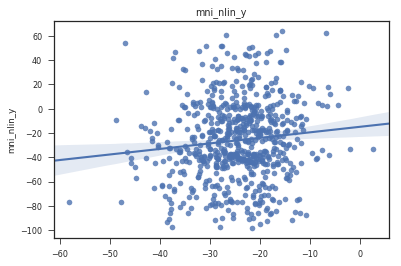

(0.10862421280089836, 0.004366860294814503)
25.806700419278716


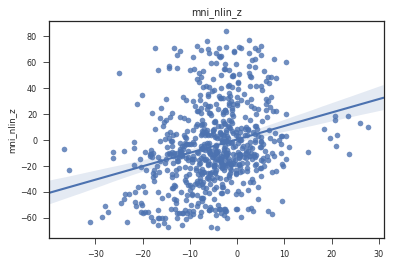

(0.268655395940062, 8.016330829507653e-13)
24.52041851942704


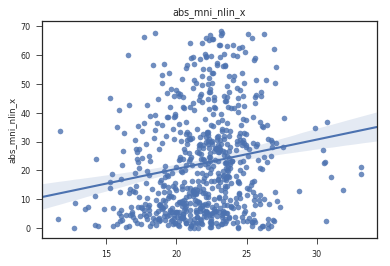

(0.17393120005187748, 4.527929830752275e-06)
14.445150630377585


In [132]:
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='CX'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)
# significant components?
print('evaluating output')
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
pls_mod.fit(tr,tr_y)
# plot model fit
print('applying to test data')
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



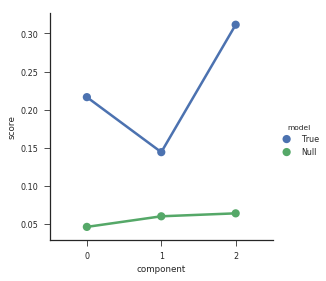

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.002  ***
applying to test data


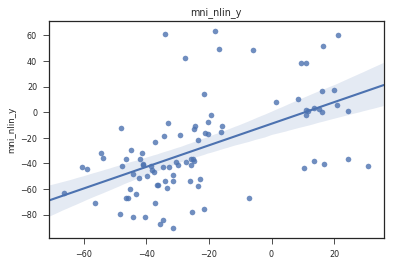

(0.5449487056586358, 1.952352111026992e-08)
23.61088432210747


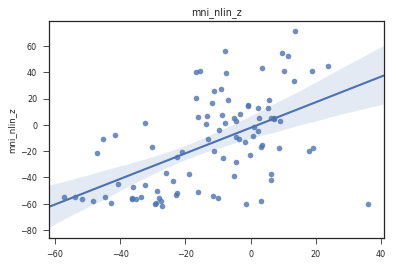

(0.5413947472184221, 2.5133010087729592e-08)
23.493742393243664


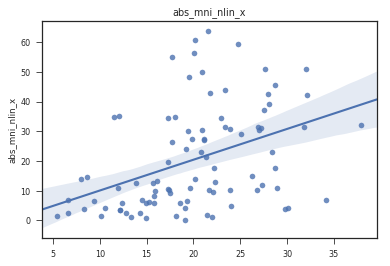

(0.41428888683916165, 4.035230870712537e-05)
12.35579878376688


In [134]:
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='CB'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)
# significant components?
print('evaluating output')
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
pls_mod.fit(tr,tr_y)
# plot model fit
print('applying to test data')
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


transforming and splitting
fitting model to training data
evaluating output
finished iteration 0
finished iteration 100
finished iteration 200
finished iteration 300
finished iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



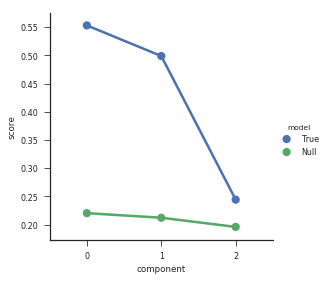

component 0: p = 0.002  ***
component 1: p = 0.002  ***
component 2: p = 0.028  ***
applying to test data


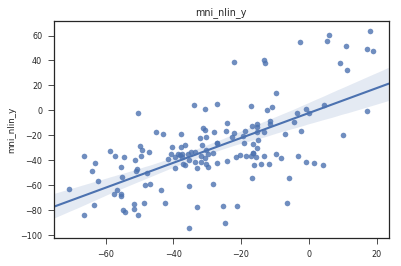

(0.6364295251072718, 4.599895736520842e-18)
18.691768417637032


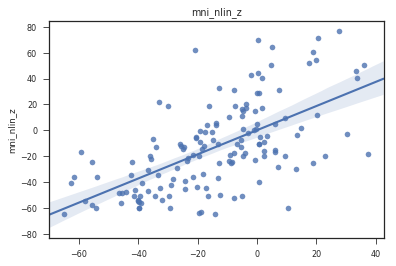

(0.6156612010958226, 1.0559165119599344e-16)
20.748597953420045


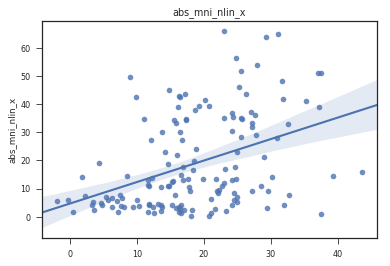

(0.41226818380475433, 2.1203702349414318e-07)
12.138839796742747


In [135]:
print('transforming and splitting')
pca_tfm = pandas.DataFrame(pcamod.transform(bigdf.values[gdf[gdf.slab_type=='BS'].index,:]))
tr,te = train_test_split(pca_tfm,random_state=123)
tr_y = gdf.loc[tr.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
te_y = gdf.loc[te.index, ['mni_nlin_y','mni_nlin_z','abs_mni_nlin_x']]
print('fitting model to training data')
pls_mod = PLSRegression(n_components=3)
pls_mod.fit(tr,tr_y)
# significant components?
print('evaluating output')
results, comp_sig = XD.evaluate_components(pls_mod, tr, tr_y)
pls_mod.fit(tr,tr_y)
# plot model fit
print('applying to test data')
te_pred = pls_mod.predict(te)
for i in range(te_y.shape[-1]):
    plt.close()
    sns.regplot(te_pred[:,i], te_y[te_y.columns[i]])
    plt.title(te_y.columns[i])
    plt.show()
    print(stats.pearsonr(te_pred[:,i], te_y[te_y.columns[i]]))
    print(mean_absolute_error(te_pred[:,i], te_y[te_y.columns[i]]))


# Understanding the components

In [198]:
Medulla = ['arcuate nucleus of medulla, left','arcuate nucleus of medulla, right',
                 'central glial substance',
                 'central medullary reticular group, left','central medullary reticular group, right',
                 'cochlear nuclei, left','cochlear nuclei, right',
                 'cuneate nucleus, left','cuneate nucleus, right',
                 'dorsal motor nucleus of the vagus, left','dorsal motor nucleus of the vagus, right',
                 'gigantocellular group, left','gigantocellular group, right',
                 'gracile nucleus, left','gracile nucleus, right',
                 'hypoglossal nucleus, left','hypoglossal nucleus, right',
                 'inferior olivary complex, left','inferior olivary complex, right',
                 'lateral medullary reticular group, left','lateral medullary reticular group, right',
                 'raphe nuclei of medulla',
                 'spinal trigeminal nucleus, left','spinal trigeminal nucleus, right',
                 'superior olivary complex, left','superior olivary complex, right',
                 'vestibular nuclei, left','vestibular nuclei, right']

Pons =          ['abducens nucleus, left','abducens nucleus, right',
                 'central gray of the pons, left','central gray of the pons, right',
                 'facial motor nucleus, left','facial motor nucleus, right',
                 'lateral parabrachial nucleus, left','lateral parabrachial nucleus, right',
                 'locus ceruleus, left','locus ceruleus, right',
                 'medial parabrachial nucleus, left','medial parabrachial nucleus, right',
                 'medial parabrachial nucleus,right',
                 'motor nucleus of trigeminal nerve, left','motor nucleus of trigeminal nerve, right',
                 'nucleus subceruleus, left','nucleus subceruleus, right',
                 'pontine nuclei, left','pontine nuclei, right',
                 'pontine raphe nucleus','pontine raphe nucleus, left',
                 'pontine reticular formation, left','pontine reticular formation, right',
                 'principal sensory nucleus of trigeminal nerve, left','principal sensory nucleus of trigeminal nerve, right',
                 ]

DCN = ['dentate nucleus, left',
       'dentate nucleus, right',
       'emboliform nucleus, left',
       'emboliform nucleus, right',
       'fastigial nucleus, left',
       'fastigial nucleus, right',
       'globose nucleus, left',
       'globose nucleus, right']

Cerebellum = [x for x in gdf[gdf.slab_type=='CB']['structure_name'].unique().tolist() if x not in DCN]

Tectum = ['inferior colliculus, left',
          'superior colliculus, left','superior colliculus, right',
          'pretectal region']

Tegmentum = ['central gray substance of midbrain, left','central gray substance of midbrain, right',
            'cuneiform nucleus, left','cuneiform nucleus, right',
            'Edinger-Westphal nucleus, left','Edinger-Westphal nucleus, right',
            'interstitial nucleus of Cajal, left','interstitial nucleus of Cajal, right',
            'midbrain raphe nuclei','midbrain raphe nuclei, left',
            'midbrain reticular formation, left','midbrain reticular formation, right',
            'nucleus of Darkschewitsch, left',
            'oculomotor nuclear complex, right','oculomotor nuclear complex, left',
            'red nucleus, left','red nucleus, right',
            'subcuneiform nucleus, left','subcuneiform nucleus, right',
            'substantia nigra, pars compacta, left','substantia nigra, pars compacta, right',
            'substantia nigra, pars reticulata, left','substantia nigra, pars reticulata, right',
            'trochlear nucleus, left','trochlear nucleus, right',
            'ventral tegmental area, left','ventral tegmental area, right']

Hypothalamus = ['anterior hypothalamic area, left','anterior hypothalamic area, right',
               'arcuate nucleus of the hypothalamus, left','arcuate nucleus of the hypothalamus, right',
               'dorsomedial hypothalamic nucleus, left',
               'lateral hypothalamic area, anterior region, left', 'lateral hypothalamic area, anterior region, right',
               'lateral hypothalamic area, mammillary region, left', 'lateral hypothalamic area, mammillary region, right',
               'lateral hypothalamic area, tuberal region, left',
               'paraventricular nucleus of the hypothalamus, left','paraventricular nucleus of the hypothalamus, right',
               'perifornical nucleus, left',
               'posterior hypothalamic area, left','posterior hypothalamic area, right',
               'preoptic region, left','preoptic region, right',
               'supraoptic nucleus, left','supraoptic nucleus, right',
               'ventromedial hypothalamic nucleus, left','ventromedial hypothalamic nucleus, right',]
                

Thalamus = ['anterior group of nuclei, left','anterior group of nuclei, right',
           'caudal group of intralaminar nuclei, left','caudal group of intralaminar nuclei, right',
           'dorsal lateral geniculate nucleus, left','dorsal lateral geniculate nucleus, right',
           'lateral group of nuclei, left, dorsal division','lateral group of nuclei, left, ventral division',
           'lateral group of nuclei, right, dorsal division','lateral group of nuclei, right, ventral division',
           'medial geniculate complex, left','medial geniculate complex, right',
           'medial group of nuclei, left','medial group of nuclei, right',
           'reticular nucleus of thalamus, left','reticular nucleus of thalamus, right',
           'rostral group of intralaminar nuclei, left','rostral group of intralaminar nuclei, right',
           'paraventricular nuclei, left of thalamus, left','paraventricular nuclei, right of thalamus, right',
           'posterior group of nuclei, left','posterior group of nuclei, right',
           'subthalamic nucleus, left','subthalamic nucleus, right',
           'zona incerta, left','zona incerta, right']

Other_Dien = ['lateral habenular nucleus, left','lateral habenular nucleus, right',
             'lateral mammillary nucleus, left',
             'lateral tuberal nucleus, left',
             'mammillary body, left','mammillary body, right',
             'medial habenular nucleus, left','medial habenular nucleus, right',
             'medial mammillary nucleus, left',
             'pallidohypothalamic nucleus, left',
             'pineal gland',
             'supramammillary nucleus, left',
             'tuberomammillary nucleus, left']

Limbic = ['CA1 field, left','CA1 field, right',
          'CA2 field, left','CA2 field, right',
          'CA3 field, left','CA3 field, right',
          'CA4 field, left','CA4 field, right',
          'amygdalohippocampal transition zone, left',
          'amygdalohippocampal transition zone, right',
          'basolateral nucleus, left','basolateral nucleus, right',
          'basomedial nucleus, left','basomedial nucleus, right',
          'central nucleus, left','central nucleus, right',
          'cortico-medial group, left','cortico-medial group, right',
          'dentate gyrus, left','dentate gyrus, right',
          'lateral nucleus, left','lateral nucleus, right',
          'septal nuclei, left','septal nuclei, right',
         'subiculum, left','subiculum, right']

Forebrain = ['basal nucleus of meynert, left','basal nucleus of meynert, right',
            'nucleus accumbens, left','nucleus accumbens, right',
            'nucleus of the diagonal band, left, horizontal division',
            'nucleus of the diagonal band, left, vertical division',
            'olfactory tubercle, left', 'piriform cortex, left',
            'substantia innominata, left','substantia innominata, right']

Striatum = ['bed  nucleus of stria terminalis, left',
            'body of caudate nucleus, left',
            'body of caudate nucleus, right',
            'globus pallidus, external segment, left','globus pallidus, external segment, right',
            'globus pallidus, internal segment, left','globus pallidus, internal segment, right',
            'head of caudate nucleus, left','head of caudate nucleus, right',
            'olfactory tubercle, left',
            'putamen, left','putamen, right',
           'tail of caudate nucleus, left','tail of caudate nucleus, right']

Anterior_Cingulate = ['cingulate gyrus, frontal part, left, inferior bank of gyrus',
                     'cingulate gyrus, frontal part, left, superior bank of gyrus',
                     'cingulate gyrus, frontal part, right, inferior bank of gyrus',
                     'cingulate gyrus, frontal part, right, superior bank of gyrus',
                     'paraterminal gyrus, right',
                     'parolfactory gyri, left','parolfactory gyri, right',
                     'subcallosal cingulate gyrus, left','subcallosal cingulate gyrus, right']

Posterior_Cingulate = ['cingulate gyrus, parietal part, left, inferior bank of gyrus',
                     'cingulate gyrus, parietal part, left, superior bank of gyrus',
                     'cingulate gyrus, parietal part, right, inferior bank of gyrus',
                     'cingulate gyrus, parietal part, right, superior bank of gyrus',
                     'cingulate gyrus, retrosplenial part, left, inferior bank of gyrus',
                     'cingulate gyrus, retrosplenial part, left, superior bank of gyrus',
                     'cingulate gyrus, retrosplenial part, right, inferior bank of gyrus',
                     'cingulate gyrus, retrosplenial part, right, superior bank of gyrus',]

Insula = ['claustrum, left','claustrum, right',
         'long insular gyri, left','long insular gyri, right',
         'short insular gyri, left','short insular gyri, right',]

Temporal = ["Heschl's gyrus, left", "Heschl's gyrus, right",
           'fusiform gyrus, left, bank of cos','fusiform gyrus, left, bank of the its',
           'fusiform gyrus, left, lateral bank of gyrus','fusiform gyrus, right, bank of cos',
           'fusiform gyrus, right, bank of the its','fusiform gyrus, right, lateral bank of gyrus',
           'inferior temporal gyrus, left, bank of mts','inferior temporal gyrus, left, bank of the its',
           'inferior temporal gyrus, left, lateral bank of gyrus','inferior temporal gyrus, right, bank of mts',
           'inferior temporal gyrus, right, bank of the its','inferior temporal gyrus, right, lateral bank of gyrus',
           'middle temporal gyrus, left, inferior bank of gyrus','middle temporal gyrus, left, superior bank of gyrus',
           'middle temporal gyrus, right, inferior bank of gyrus','middle temporal gyrus, right, superior bank of gyrus',
           'occipito-temporal gyrus, left, inferior bank of gyrus','occipito-temporal gyrus, left, superior bank of gyrus',
           'occipito-temporal gyrus, right, inferior bank of gyrus','occipito-temporal gyrus, right, superior bank of gyrus',
           'parahippocampal gyrus, left, bank of the cos','parahippocampal gyrus, left, lateral bank of gyrus',
           'parahippocampal gyrus, right, bank of the cos','parahippocampal gyrus, right, lateral bank of gyrus',
           'superior temporal gyrus, left, inferior bank of gyrus','superior temporal gyrus, left, lateral bank of gyrus',
           'superior temporal gyrus, right, inferior bank of gyrus','superior temporal gyrus, right, lateral bank of gyrus',
           'temporal pole, left, inferior aspect','temporal pole, left, medial aspect',
           'temporal pole, left, superior aspect','temporal pole, right, inferior aspect',
           'temporal pole, right, medial aspect','temporal pole, right, superior aspect',
           'transverse gyri, left','transverse gyri, right',
           'planum polare, left','planum polare, right',
           'planum temporale, left','planum temporale, right']

Parietal = ['angular gyrus, left, inferior bank of gyrus','angular gyrus, left, superior bank of gyrus',
            'angular gyrus, right, inferior bank of gyrus','angular gyrus, right, superior bank of gyrus',
            'precuneus, left, inferior lateral bank of gyrus','precuneus, left, superior lateral bank of gyrus',
            'precuneus, right, inferior lateral bank of gyrus','precuneus, right, superior lateral bank of gyrus',
            'superior parietal lobule, left, inferior bank of gyrus','superior parietal lobule, left, superior bank of gyrus',
            'superior parietal lobule, right, inferior bank of gyrus','superior parietal lobule, right, superior bank of gyrus',
            'supramarginal gyrus, left, inferior bank of gyrus','supramarginal gyrus, left, superior bank of gyrus',
            'supramarginal gyrus, right, inferior bank of gyrus','supramarginal gyrus, right, superior bank of gyrus']

Frontal = ['anterior orbital gyrus, left','anterior orbital gyrus, right',
           'arcuate nucleus of the hypothalamus, left','arcuate nucleus of the hypothalamus, right',
          'frontal operculum, left','frontal operculum, right',
          'frontal pole, left, inferior aspect','frontal pole, left, medial aspect',
          'frontal pole, left, superior aspect','frontal pole, right, inferior aspect',
          'frontal pole, right, medial aspect','frontal pole, right, superior aspect',
          'gyrus rectus, left','gyrus rectus, right',
          'inferior frontal gyrus, opercular part, left','inferior frontal gyrus, opercular part, right',
          'inferior frontal gyrus, orbital part, left','inferior frontal gyrus, orbital part, right',
          'inferior frontal gyrus, triangular part, left','inferior frontal gyrus, triangular part, right',
          'inferior rostral gyrus, left','inferior rostral gyrus, right',
          'lateral orbital gyrus, left','lateral orbital gyrus, right',
          'medial orbital gyrus, left','medial orbital gyrus, right',
          'middle frontal gyrus, left, inferior bank of gyrus','middle frontal gyrus, left, superior bank of gyrus',
          'middle frontal gyrus, right, inferior bank of gyrus','middle frontal gyrus, right, superior bank of gyrus',
          'posterior orbital gyrus, left','posterior orbital gyrus, right',
          'superior frontal gyrus, left','superior frontal gyrus, left, lateral bank of gyrus',
          'superior frontal gyrus, left, medial bank of gyrus','superior frontal gyrus, right, lateral bank of gyrus',
          'superior frontal gyrus, right, medial bank of gyrus',
          'superior rostral gyrus, left','superior rostral gyrus, right']

Occipital = ['cuneus, left, peristriate',
             'cuneus, left, striate',
             'cuneus, right, peristriate',
             'cuneus, right, striate',
             'inferior occipital gyrus, left, inferior bank of gyrus','inferior occipital gyrus, left, superior bank of gyrus',
             'inferior occipital gyrus, right, inferior bank of gyrus','inferior occipital gyrus, right, superior bank of gyrus',
             'lingual gyrus, left, peristriate','lingual gyrus, left, striate',
             'lingual gyrus, right, peristriate','lingual gyrus, right, striate',
             'occipital pole, left, inferior aspect',
             'occipital pole, left, lateral aspect','occipital pole, left, superior aspect',
             'superior occipital gyrus, left, inferior bank of gyrus','superior occipital gyrus, left, superior bank of gyrus',
             'superior occipital gyrus, right, inferior bank of gyrus','superior occipital gyrus, right, superior bank of gyrus',]

Sensorimotor = ['paracentral lobule, anterior part, left','paracentral lobule, anterior part, left, inferior bank of gyrus',
                'paracentral lobule, anterior part, left, superior bank of gyrus','paracentral lobule, anterior part, right, inferior bank of gyrus',
                'paracentral lobule, anterior part, right, superior bank of gyrus','paracentral lobule, posterior part, left, bank of cingulate sulcus',
                'paracentral lobule, posterior part, left, lateral bank of gyrus','paracentral lobule, posterior part, right, bank of cingulate sulcus',
                'paracentral lobule, posterior part, right, lateral bank of gyrus',
                'postcentral gyrus, left, bank of the central sulcus','postcentral gyrus, left, bank of the posterior central sulcus',
                'postcentral gyrus, left, inferior lateral aspect of gyrus','postcentral gyrus, left, superior lateral aspect of gyrus',
                'postcentral gyrus, right, bank of the central sulcus','postcentral gyrus, right, bank of the posterior central sulcus',
                'postcentral gyrus, right, inferior lateral aspect of gyrus','postcentral gyrus, right, superior lateral aspect of gyrus',
                'precentral gyrus, left, bank of the central sulcus','precentral gyrus, left, bank of the precentral sulcus',
                'precentral gyrus, left, inferior lateral aspect of gyrus','precentral gyrus, left, superior lateral aspect of gyrus',
                'precentral gyrus, right, bank of the central sulcus','precentral gyrus, right, bank of the precentral sulcus',
                'precentral gyrus, right, inferior lateral aspect of gyrus','precentral gyrus, right, superior lateral aspect of gyrus']
            
divs = [Medulla, Pons, DCN, Cerebellum, Tectum, Tegmentum, Hypothalamus, Thalamus, Other_Dien,
                  Limbic, Forebrain, Striatum, Anterior_Cingulate, Posterior_Cingulate, Insula,
                  Temporal, Frontal, Parietal, Occipital, Sensorimotor]
names = ['Medulla', 'Pons', 'DCN', 'Cerebellum', 'Tectum', 'Tegmentum', 'Hypothalamus', 'Thalamus', 
         'Other_Dien', 'Limbic', 'Forebrain', 'Striatum', 'Anterior_Cingulate', 'Posterior_Cingulate', 
         'Insula', 'Temporal', 'Frontal', 'Parietal', 'Occipital', 'Sensorimotor']
brain_division = dict(zip(names,divs))

for name, div in brain_division.items():
    gdf.loc[gdf[gdf.structure_name.isin(div)].index,'brain_divison'] = name
    

In [200]:
# For C1
Meyelencephalon = Medulla[:] 
Metencelphalon = Pons + DCN + Cerebellum
Mesencephalon = Tectum + Tegmentum
Diencephalon = Hypothalamus + Thalamus + Other_Dien
Telencephalon = Limbic + Forebrain + Striatum + Anterior_Cingulate + Posterior_Cingulate +\
                Insula + Temporal + Frontal + Parietal + Occipital + Sensorimotor

divs = [Meyelencephalon, Metencelphalon, Mesencephalon, Diencephalon, Telencephalon]
names = ['Meyelencephalon', 'Metencelphalon', 'Mesencephalon', 'Diencephalon', 'Telencephalon']
brain_division = dict(zip(names,divs))

for name, div in brain_division.items():
    gdf.loc[gdf[gdf.structure_name.isin(div)].index,'Neural_Tube_segment'] = name
    

In [333]:
# For C3

Auditory = ["Heschl's gyrus, left", "Heschl's gyrus, right",
            'planum polare, left','planum polare, right',
            'planum temporale, left','planum temporale, right',
            'transverse gyri, left','transverse gyri, right']
Visual = ['cuneus, left, peristriate','cuneus, left, striate',
                 'cuneus, right, peristriate','cuneus, right, striate',
                 'lingual gyrus, left, peristriate','lingual gyrus, left, striate',
                 'lingual gyrus, right, peristriate','lingual gyrus, right, striate']
Olfactory = ['olfactory tubercle, left', 'piriform cortex, left']


Sensory_Cortex = Sensorimotor + Auditory + Visual + Olfactory
gdf.loc[gdf[gdf.structure_name.isin(Sensory_Cortex)].index,'Cortical_Type'] = 'Sensory'

Association_Cortex = [x for x in Telencephalon if x not in Striatum and x not in Sensory_Cortex]
gdf.loc[gdf[gdf.structure_name.isin(Association_Cortex)].index,'Cortical_Type'] = 'Association_Cortex'

Not_Cortex = Meyelencephalon + Mesencephalon + Metencelphalon + Diencephalon + Striatum
gdf.loc[gdf[gdf.structure_name.isin(Not_Cortex)].index,'Cortical_Type'] = 'Not Cortex'


divs = [Auditory, Visual, Olfactory, Sensorimotor, Association_Cortex, Not_Cortex]
names = ['Auditory','Visual','Olfactory','Sensorimotor','Association_Cortex','Not_Cortex']
brain_division = dict(zip(names,divs))
for name, div in brain_division.items():
    gdf.loc[gdf[gdf.structure_name.isin(div)].index,'Sensory_Type'] = name


In [302]:
gdf.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/MAIN_gcx_wholebrain_info_W_BRAIN_DIVISIONS.csv')

In [344]:
code = dict(zip(gdf.Neural_Tube_segment.unique().tolist(),
               range(len(gdf.Neural_Tube_segment.unique().tolist()))))
labs = [code[x] if pandas.notnull(x) else 999 for x in gdf.Neural_Tube_segment.values]
embedding = gdf[['abs_mni_nlin_x','mni_nlin_y','mni_nlin_z']].values

lmap = {v: k for k, v in code.items()}
lmap.pop(5)
lmap.update({999: 'NaN'})
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab10(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, 
                    filename='/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/NT_brain.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 19355 is still running



'file:///home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/NT_brain.html'

In [345]:
code = dict(zip(gdf.Neural_Tube_segment.unique().tolist(),
               range(len(gdf.Neural_Tube_segment.unique().tolist()))))
labs = [code[x] if pandas.notnull(x) else 999 for x in gdf.Neural_Tube_segment.values]
embedding = preds_df[['predicted_x','predicted_y','predicted_z']].values

lmap = {v: k for k, v in code.items()}
lmap.pop(5)
lmap.update({999: 'NaN'})
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab10(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, 
                    filename='/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/NT_brain_predicted.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 19407 is still running



'file:///home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/NT_brain_predicted.html'

In [346]:
code = dict(zip(gdf.brain_divison.unique().tolist(),
               range(len(gdf.brain_divison.unique().tolist()))))
labs = [code[x] if pandas.notnull(x) else 999 for x in gdf.brain_divison.values]
embedding = gdf[['abs_mni_nlin_x','mni_nlin_y','mni_nlin_z']].values

lmap = {v: k for k, v in code.items()}
lmap.pop(19)
lmap.update({999: 'NaN'})
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab20(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, 
                    filename='/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/brain.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 19435 is still running



'file:///home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/brain.html'

In [347]:
code = dict(zip(gdf.brain_divison.unique().tolist(),
               range(len(gdf.brain_divison.unique().tolist()))))
labs = [code[x] if pandas.notnull(x) else 999 for x in gdf.brain_divison.values]
embedding = preds_df[['predicted_x','predicted_y','predicted_z']].values

lmap = {v: k for k, v in code.items()}
lmap.pop(19)
lmap.update({999: 'NaN'})
traces = list()
for lab in np.unique(labs):
    l_index = [x for x in range(len(labs)) if labs[x] == lab]
    l_embed = embedding[l_index]
#     color_str = str(int('0x' + color_dict[lab][1:3].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][3:5].upper(),16)) + ',' + \
#                    str(int('0x' + color_dict[lab][5:7].upper(),16))
    #color_str = plt.cm.tab10.colors[lab]
    color_str = 'rgba %s'%str(tuple([x - 0.0000001 for x in plt.cm.tab20(lab) if x > 0]))
    temp_trace = plotly.graph_objs.Scatter3d(x=l_embed[:,0],
                                            y = l_embed[:,1],
                                            z = l_embed[:,2],
                                            name = lmap[lab],
                                            mode = 'markers',
                                            marker = dict(size=3,
                                                          color=color_str
                                                         )
                                            )
    traces.append(temp_trace)

layout = plotly.graph_objs.Layout(margin = dict(l=0,r=0,b=0,t=0))

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.plot(fig, 
                    filename='/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/brain_predicted.html')
    

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/subprocess.py:761: ResourceWarning:

subprocess 19487 is still running



'file:///home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/brain_predicted.html'

In [206]:
gdf.loc[:,'Component1_Expresion'] = c1_xp
gdf.loc[:,'Component2_Expresion'] = c2_xp
gdf.loc[:,'Component3_Expresion'] = c3_xp


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



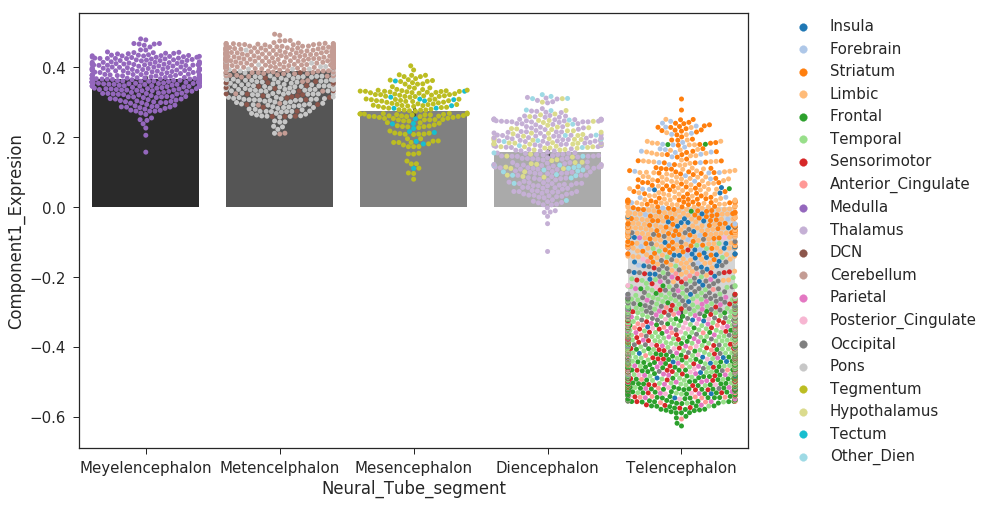

In [314]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Meyelencephalon', 'Metencelphalon', 'Mesencephalon', 'Diencephalon', 'Telencephalon']
sns.barplot(x='Neural_Tube_segment', y='Component1_Expresion', data=gdf,palette='gray',
           order = order)
sns.swarmplot(x='Neural_Tube_segment', y='Component1_Expresion', data=gdf, hue='brain_divison',
              order = order, palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C1_NT.pdf',
           bbox_inches='tight')

In [236]:
bsn = []
for x in gdf.structure_name.values:
    if ',' in x:
        bsn.append(x.split(',')[0])
    else:
        bsn.append(x)
gdf.loc[:,'bilateral_structure_name'] = bsn

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



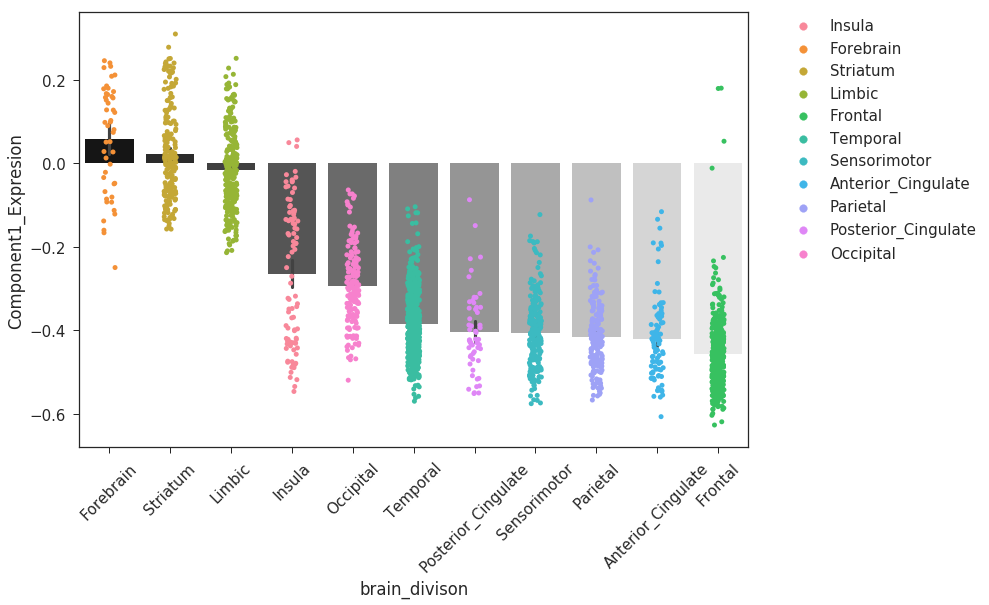

In [349]:
plt.subplots(figsize=(12,8))
order = ['Forebrain', 'Striatum', 'Limbic', 'Insula', 'Occipital',
        'Temporal','Posterior_Cingulate','Sensorimotor','Parietal',
        'Anterior_Cingulate','Frontal']
g=sns.barplot(x='brain_divison', y='Component1_Expresion', order = order,
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'], palette='gray',
           )
h=sns.stripplot(x='brain_divison', y='Component1_Expresion', order=order,jitter=True,
              hue='brain_divison',
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'],
           )
for item in h.get_xticklabels():
    item.set_rotation(45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C1_Tele.pdf',
           bbox_inches='tight')

In [332]:
gdf.Sensory_Type.value_counts()

Association_Cortex    1738
Sensorimotor           216
Visual                 109
Auditory                60
Olfactory                8
Name: Sensory_Type, dtype: int64

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead



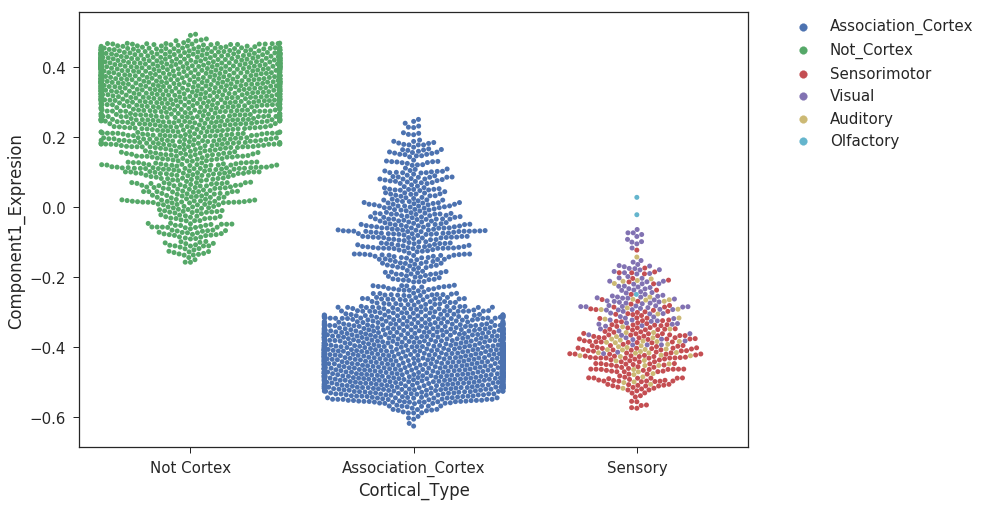

In [338]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Not Cortex','Association_Cortex','Sensory']
sns.swarmplot(x='Cortical_Type', y='Component1_Expresion', data=gdf, hue='Sensory_Type', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C1_Modals.pdf',
           bbox_inches='tight')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



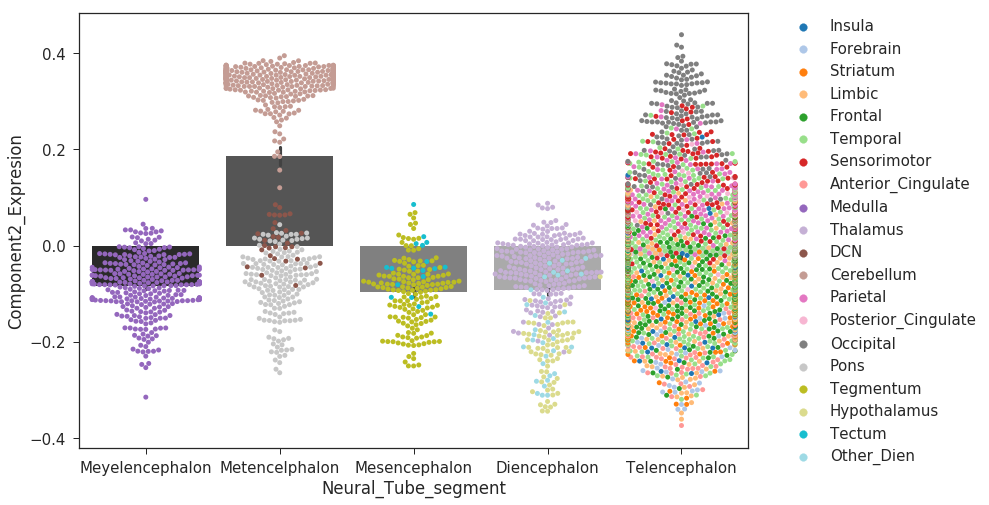

In [315]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Meyelencephalon', 'Metencelphalon', 'Mesencephalon', 'Diencephalon', 'Telencephalon']
sns.barplot(x='Neural_Tube_segment', y='Component2_Expresion', data=gdf,palette='gray',
           order = order)
sns.swarmplot(x='Neural_Tube_segment', y='Component2_Expresion', data=gdf, hue='brain_divison',
              order = order, palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C2_NT.pdf',
           bbox_inches='tight')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



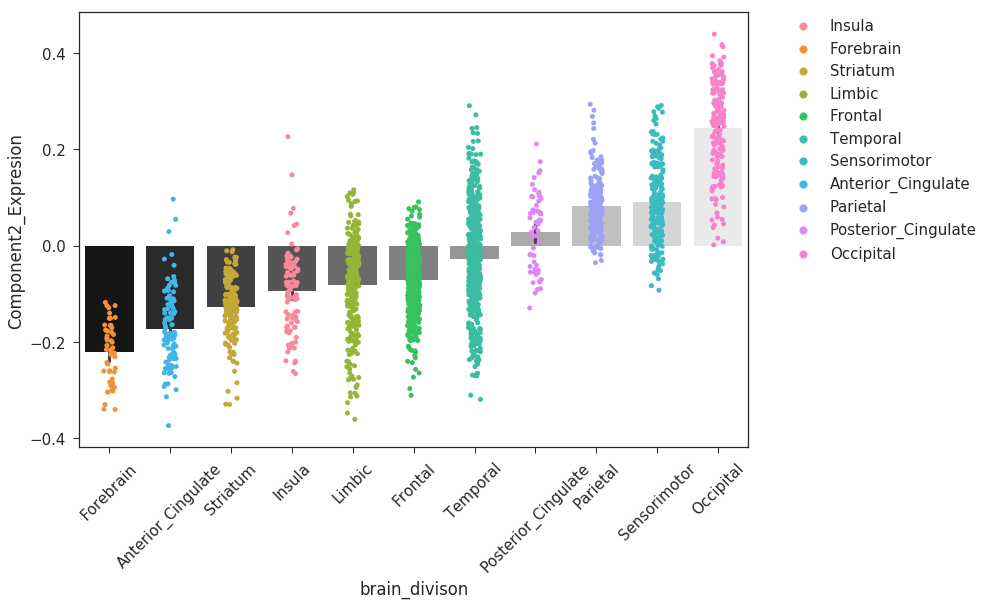

In [319]:
order = gdf[gdf.Neural_Tube_segment=='Telencephalon'
           ].pivot_table(values='Component2_Expresion',index = 'brain_divison'
                       ).sort_values('Component2_Expresion').index

plt.subplots(figsize=(12,8))
g=sns.barplot(x='brain_divison', y='Component2_Expresion', order = order,
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'], palette='gray',
           )
h=sns.stripplot(x='brain_divison', y='Component2_Expresion', order=order,jitter=True,
              hue='brain_divison',
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'],
           )
for item in h.get_xticklabels():
    item.set_rotation(45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C2_Tele.pdf',
           bbox_inches='tight')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead



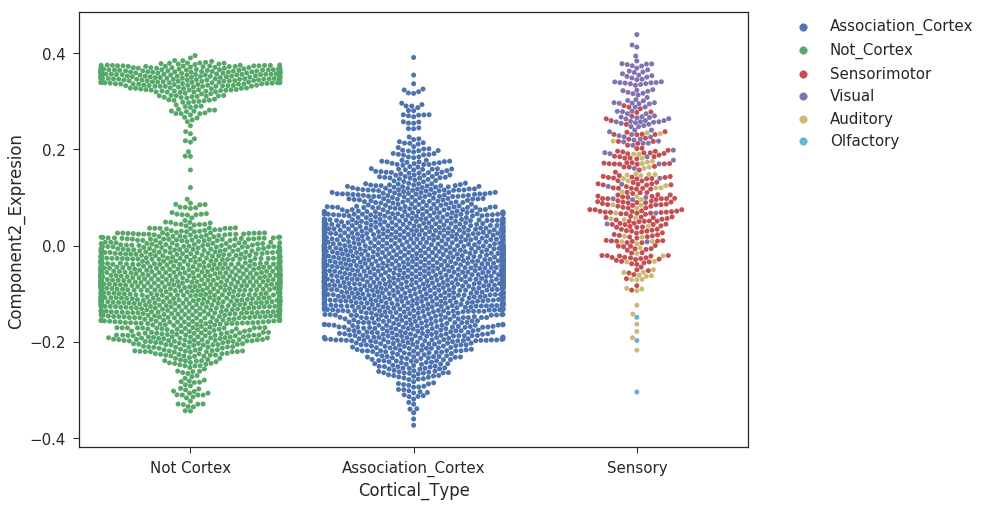

In [340]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Not Cortex','Association_Cortex','Sensory']
sns.swarmplot(x='Cortical_Type', y='Component2_Expresion', data=gdf, hue='Sensory_Type', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C2_Modals.pdf',
           bbox_inches='tight')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



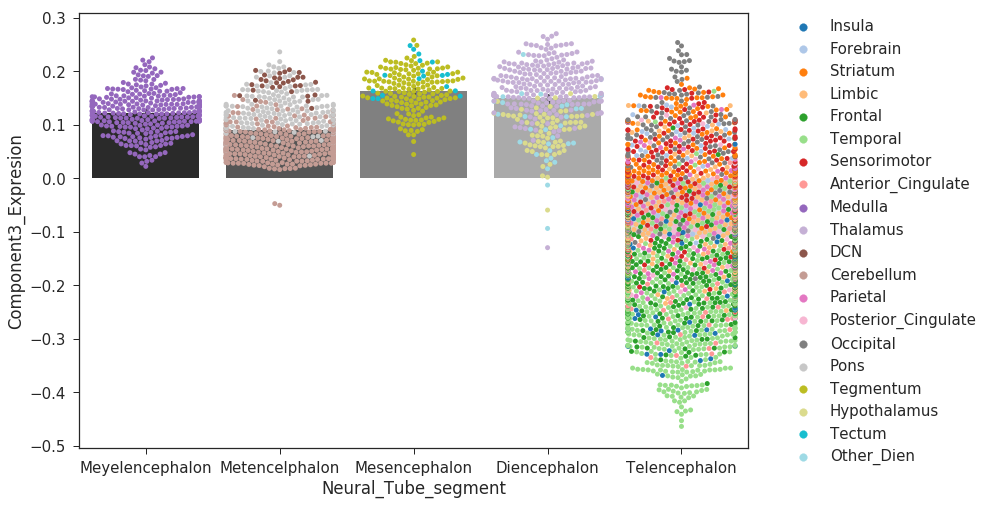

In [316]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Meyelencephalon', 'Metencelphalon', 'Mesencephalon', 'Diencephalon', 'Telencephalon']
sns.barplot(x='Neural_Tube_segment', y='Component3_Expresion', data=gdf,palette='gray',
           order = order)
sns.swarmplot(x='Neural_Tube_segment', y='Component3_Expresion', data=gdf, hue='brain_divison',
              order = order, palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C3_NT.pdf',
           bbox_inches='tight')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



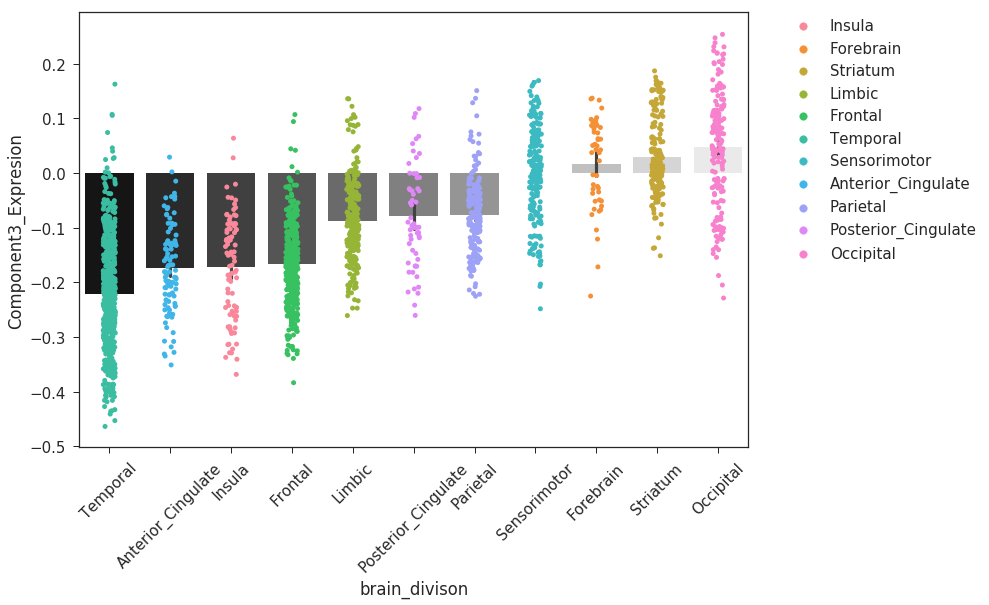

In [320]:
order = gdf[gdf.Neural_Tube_segment=='Telencephalon'
           ].pivot_table(values='Component3_Expresion',index = 'brain_divison'
                       ).sort_values('Component3_Expresion').index

plt.subplots(figsize=(12,8))
g=sns.barplot(x='brain_divison', y='Component3_Expresion', order = order,
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'], palette='gray',
           )
h=sns.stripplot(x='brain_divison', y='Component3_Expresion', order=order,jitter=True,
              hue='brain_divison',
            data=gdf[gdf.Neural_Tube_segment=='Telencephalon'],
           )
for item in h.get_xticklabels():
    item.set_rotation(45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C3_Tele.pdf',
           bbox_inches='tight')

In [260]:
gdf.columns[-10:]

Index(['new_structure_acronym', 'abs_mni_nlin_x', 'brain_divison',
       'Neural_Tube_segment', 'Sensory_Type', 'Cortical_Type',
       'Component1_Expresion', 'Component2_Expresion', 'Component3_Expresion',
       'bilateral_structure_name'],
      dtype='object')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning:

pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead



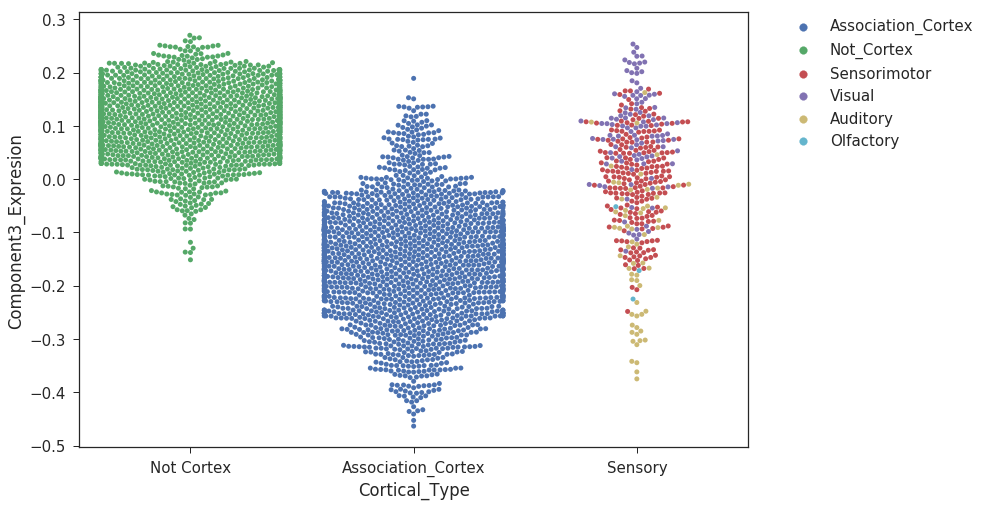

In [348]:
sns.set_context('notebook',font_scale=1.5)
plt.subplots(figsize=(12,8))
order = ['Not Cortex','Association_Cortex','Sensory']
sns.swarmplot(x='Cortical_Type', y='Component3_Expresion', data=gdf, hue='Sensory_Type',order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NEUR608/ADDX/C3_Modals.pdf',
           bbox_inches='tight')

In [355]:
for col in gdf.columns[-4:-1]:
    

Index(['Component1_Expresion', 'Component2_Expresion', 'Component3_Expresion'], dtype='object')

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



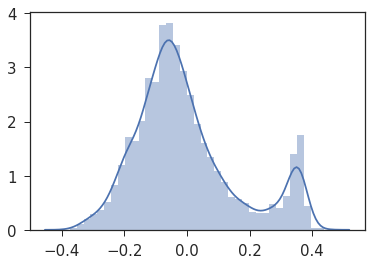

In [352]:
sns.distplot(c2_xp)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



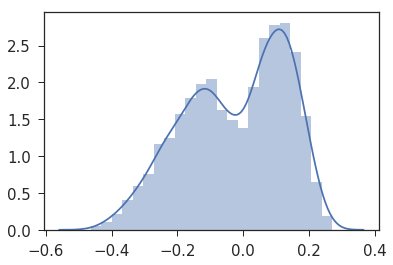

In [353]:
sns.distplot(c3_xp)